<a href="https://colab.research.google.com/github/JogaEkshitha/Datascience/blob/main/Yogandhra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Successfully read file: /content/Vizag Volunteers - Sheet1.csv

Analysis for Vizag Volunteers:
Total Participants: 95,760
Total QR Codes Given: 108,950
Total QR Codes Scanned: 107,792
QR Code Scan Rate: 98.94%

Zone-wise Summary:
        Zone  No of Participants  No of QR Codes Given  No of  QR's Scanned  \
0    Zone 10                2688                  3000                 2855   
1   Zone 107                2688                  3000                 2953   
2   Zone 109                2688                  3000                 3193   
3    Zone 11                2688                  3000                 2968   
4   Zone 111                2688                  3000                 3006   
5   Zone 113                2688                  3000                 2990   
6   Zone 114                2688                  3000                 2897   
7   Zone 115                2688                  3000                 2934   
8   Zone 116                2688                  3000     

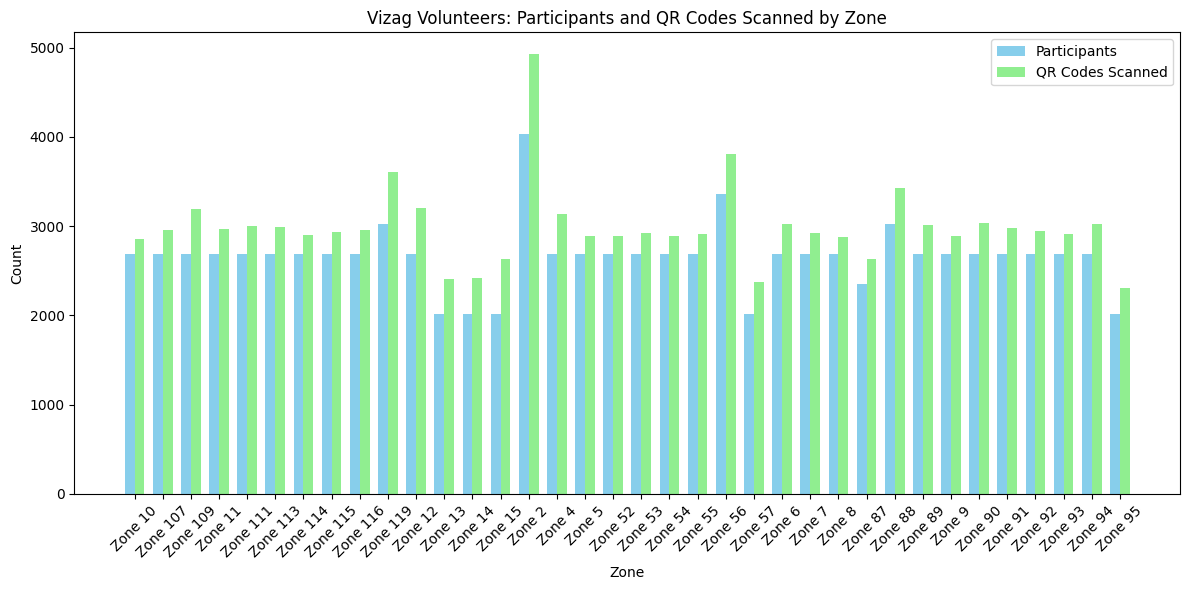

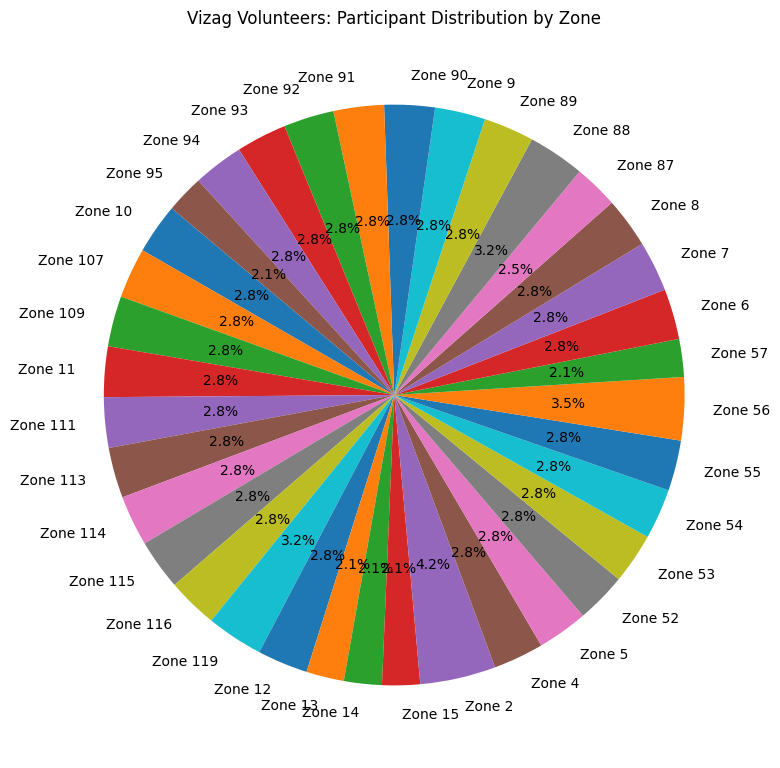


Top 5 Compartments by QR Codes Scanned:
        Zone           Compartment Name  No of Participants  \
20   Zone 12    Beach Road- Teneti Park                1344   
70  Zone 109           Law College Road                1344   
4     Zone 4     Beach Road- Park Hotel                1344   
8     Zone 6  Beach Road - Kurupam Tomb                1344   
50   Zone 88        GOKARTING LAND - II                1344   

    No of  QR's Scanned  
20                 1769  
70                 1720  
4                  1682  
8                  1551  
50                 1529  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files

try:
    # Specify the path to the CSV file (update if file is in a different location)
    CSV_FILE = "/content/Vizag Volunteers - Sheet1.csv"

    # Check if the file exists
    if not os.path.exists(CSV_FILE):
        raise FileNotFoundError(f"CSV file not found at {CSV_FILE}. Please upload it to the Colab environment.")

    # Read the CSV file
    try:
        df = pd.read_csv(CSV_FILE)
        print(f"Successfully read file: {CSV_FILE}")
    except Exception as e:
        print(f"Error reading CSV file: {str(e)}")
        raise e

    # Ensure numeric columns are properly typed
    numeric_columns = ['No of Participants', 'No of QR Codes Given', 'No of  QR\'s Scanned']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Check for missing or non-numeric data
    if df[numeric_columns].isna().any().any():
        print("Warning: Missing or non-numeric data found. NaN values will be treated as 0.")
        df.fillna(0, inplace=True)

    # Calculate key metrics
    total_participants = df['No of Participants'].sum()
    total_qr_given = df['No of QR Codes Given'].sum()
    total_qr_scanned = df['No of  QR\'s Scanned'].sum()
    scan_rate = (total_qr_scanned / total_qr_given * 100) if total_qr_given > 0 else 0

    # Group by Zone for analysis
    zone_summary = df.groupby('Zone').agg({
        'No of Participants': 'sum',
        'No of QR Codes Given': 'sum',
        'No of  QR\'s Scanned': 'sum',
        'Compartments': 'count'
    }).reset_index()

    # Print summary statistics
    print("\nAnalysis for Vizag Volunteers:")
    print(f"Total Participants: {total_participants:,}")
    print(f"Total QR Codes Given: {total_qr_given:,}")
    print(f"Total QR Codes Scanned: {total_qr_scanned:,}")
    print(f"QR Code Scan Rate: {scan_rate:.2f}%")
    print("\nZone-wise Summary:")
    print(zone_summary)

    # Visualization 1: Bar Chart (Participants and QR Codes Scanned by Zone)
    plt.figure(figsize=(12, 6))
    bar_width = 0.35
    x = range(len(zone_summary))
    plt.bar(x, zone_summary['No of Participants'], width=bar_width, label='Participants', color='skyblue')
    plt.bar([i + bar_width for i in x], zone_summary['No of  QR\'s Scanned'], width=bar_width, label='QR Codes Scanned', color='lightgreen')
    plt.xlabel('Zone')
    plt.ylabel('Count')
    plt.title('Vizag Volunteers: Participants and QR Codes Scanned by Zone')
    plt.xticks([i + bar_width/2 for i in x], zone_summary['Zone'], rotation=45)
    plt.legend()
    plt.tight_layout()
    bar_file = 'participant_distribution_vizag_volunteers.png'
    plt.savefig(bar_file, dpi=300)
    plt.show()
    plt.close()

    # Visualization 2: Pie Chart (Participant Distribution by Zone)
    plt.figure(figsize=(8, 8))
    plt.pie(zone_summary['No of Participants'], labels=zone_summary['Zone'], autopct='%1.1f%%', startangle=140)
    plt.title('Vizag Volunteers: Participant Distribution by Zone')
    plt.tight_layout()
    pie_file = 'zone_distribution_vizag_volunteers.png'
    plt.savefig(pie_file, dpi=300)
    plt.show()
    plt.close()

    # Find top-performing compartments
    top_compartments = df.nlargest(5, 'No of  QR\'s Scanned')[['Zone', 'Compartment Name', 'No of Participants', 'No of  QR\'s Scanned']]
    print("\nTop 5 Compartments by QR Codes Scanned:")
    print(top_compartments)

    # Download the generated visualizations
    for file in [bar_file, pie_file]:
        if os.path.exists(file):
            print(f"Downloading {file}")
            files.download(file)
        else:
            print(f"File {file} not generated.")

except Exception as e:
    print(f"Error during execution: {str(e)}")

Successfully read file: /content/Vizag Volunteers - Sheet1.csv

Analysis for Vizag Volunteers:
Total Participants: 95,760
Total QR Codes Given: 108,950
Total QR Codes Scanned: 107,792
QR Code Scan Rate: 98.94%

Zone-wise Summary (Copy this table into LaTeX report):
\begin{table}[h]
\caption{Zone-wise Summary for Vizag Volunteers}
\thbold
\tr:nth-child(even)#e6f3ff
\tr:nth-child(odd)#ffffff
\label{tab:zone_summary_vizag}
\begin{tabular}{llrrr}
 & Zone & No of Participants & No of QR Codes Given & No of  QR's Scanned & Compartments \\
0 & \background-colorwhite \border-colorblack \border-stylesolid \border-width1px Zone 2 & \background-colorwhite \border-colorblack \border-stylesolid \border-width1px 4032 & \background-colorwhite \border-colorblack \border-stylesolid \border-width1px 5000 & \background-colorwhite \border-colorblack \border-stylesolid \border-width1px 4925 & \background-colorwhite \border-colorblack \border-stylesolid \border-width1px 4 \\
1 & \background-colorwhite \bord

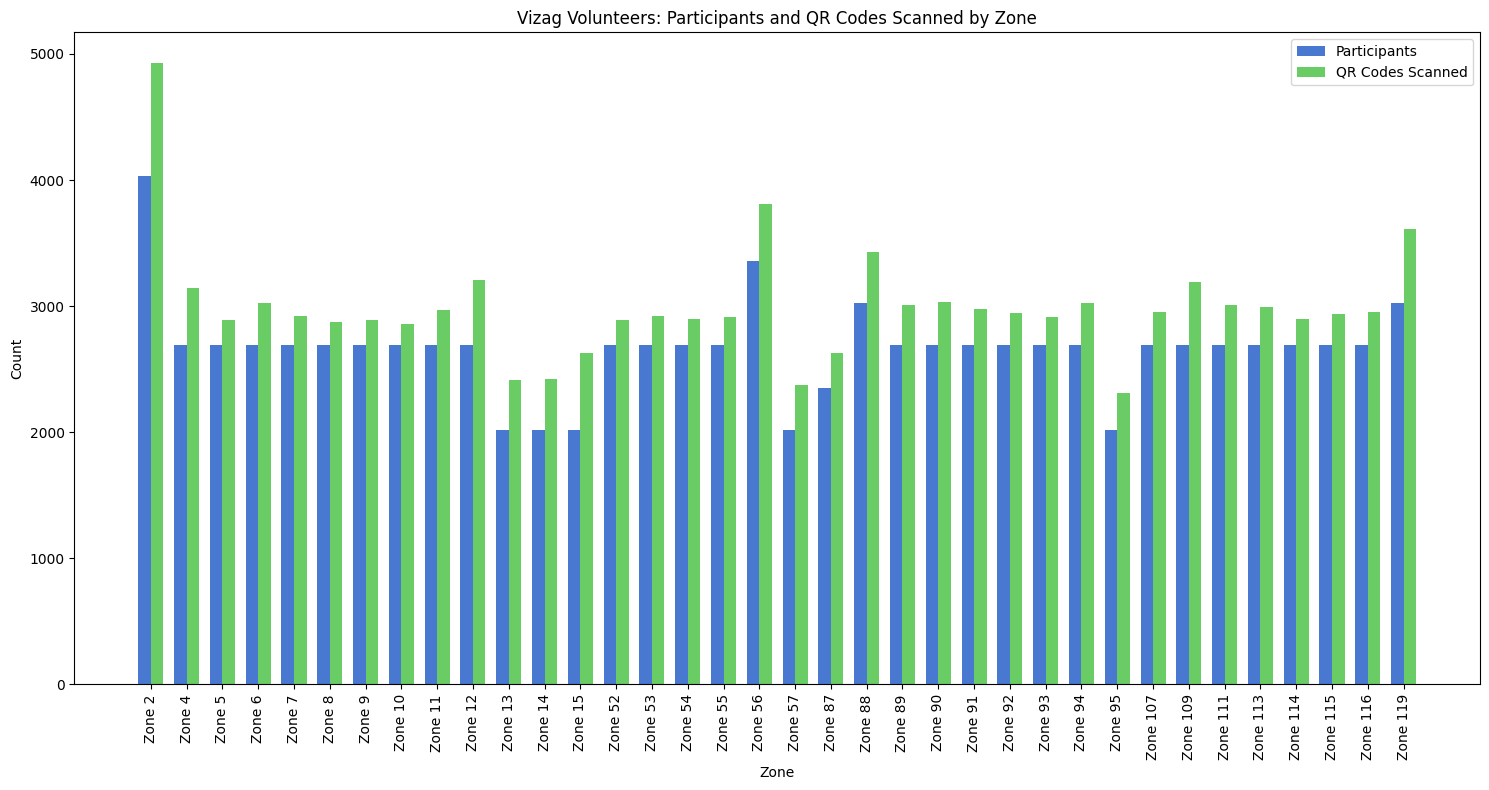

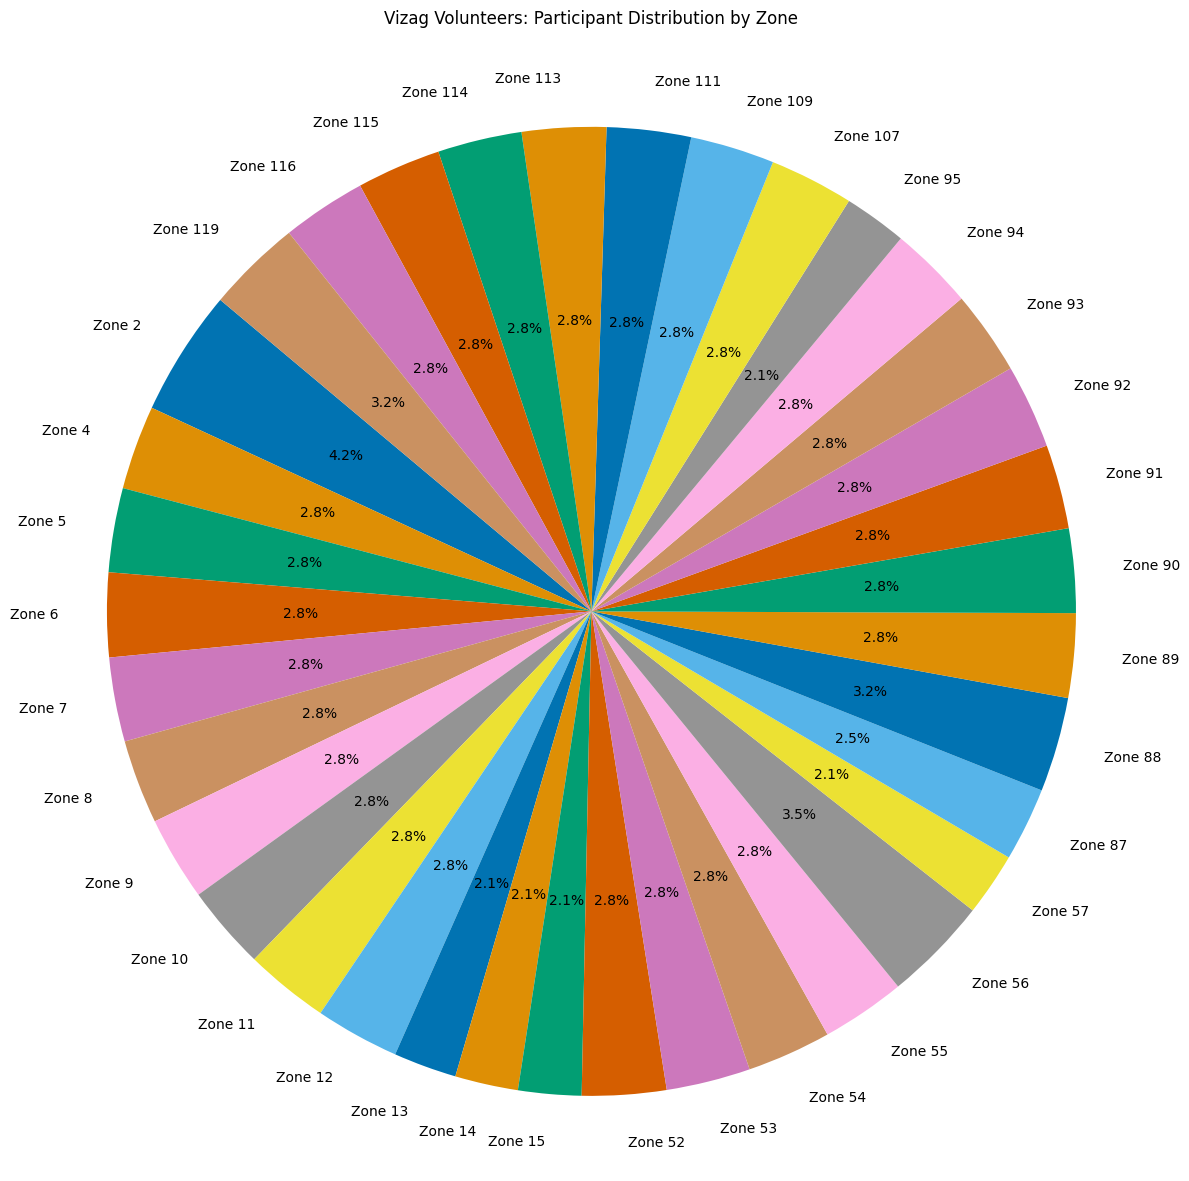


Top 5 Compartments by QR Codes Scanned (Copy this table into LaTeX report):
\begin{table}[h]
\caption{Top 5 Compartments by QR Codes Scanned for Vizag Volunteers}
\thbold
\tr:nth-child(even)#e6f3ff
\tr:nth-child(odd)#ffffff
\label{tab:top_compartments_vizag}
\begin{tabular}{llrr}
 & Zone & Compartment Name & No of Participants & No of  QR's Scanned \\
0 & \background-colorwhite \border-colorblack \border-stylesolid \border-width1px Zone 12 & \background-colorwhite \border-colorblack \border-stylesolid \border-width1px Beach Road- Teneti Park & \background-colorwhite \border-colorblack \border-stylesolid \border-width1px 1344 & \background-colorwhite \border-colorblack \border-stylesolid \border-width1px 1769 \\
1 & \background-colorwhite \border-colorblack \border-stylesolid \border-width1px Zone 109 & \background-colorwhite \border-colorblack \border-stylesolid \border-width1px Law College Road & \background-colorwhite \border-colorblack \border-stylesolid \border-width1px 1344 & \ba

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files

try:
    # Specify the path to the CSV file
    CSV_FILE = "/content/Vizag Volunteers - Sheet1.csv"

    # Check if the file exists
    if not os.path.exists(CSV_FILE):
        raise FileNotFoundError(f"CSV file not found at {CSV_FILE}. Please upload it to the Colab environment.")

    # Read the CSV file
    try:
        df = pd.read_csv(CSV_FILE)
        print(f"Successfully read file: {CSV_FILE}")
    except Exception as e:
        print(f"Error reading CSV file: {str(e)}")
        raise e

    # Ensure numeric columns are properly typed
    numeric_columns = ['No of Participants', 'No of QR Codes Given', 'No of  QR\'s Scanned']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Check for missing or non-numeric data
    if df[numeric_columns].isna().any().any():
        print("Warning: Missing or non-numeric data found. NaN values will be treated as 0.")
        df.fillna(0, inplace=True)

    # Calculate key metrics
    total_participants = df['No of Participants'].sum()
    total_qr_given = df['No of QR Codes Given'].sum()
    total_qr_scanned = df['No of  QR\'s Scanned'].sum()
    scan_rate = (total_qr_scanned / total_qr_given * 100) if total_qr_given > 0 else 0

    # Group by Zone for analysis, preserving original order
    zone_summary = df.groupby('Zone').agg({
        'No of Participants': 'sum',
        'No of QR Codes Given': 'sum',
        'No of  QR\'s Scanned': 'sum',
        'Compartments': 'count'
    }).reset_index()
    # Sort zones as they appear in the data
    zone_order = df['Zone'].drop_duplicates().tolist()
    zone_summary['Zone'] = pd.Categorical(zone_summary['Zone'], categories=zone_order, ordered=True)
    zone_summary = zone_summary.sort_values('Zone').reset_index(drop=True)

    # Print summary statistics
    print("\nAnalysis for Vizag Volunteers:")
    print(f"Total Participants: {total_participants:,}")
    print(f"Total QR Codes Given: {total_qr_given:,}")
    print(f"Total QR Codes Scanned: {total_qr_scanned:,}")
    print(f"QR Code Scan Rate: {scan_rate:.2f}%")

    # Zone-wise Summary in styled table
    styled_zone_summary = zone_summary.style.set_properties(**{
        'background-color': 'white',
        'border-color': 'black',
        'border-style': 'solid',
        'border-width': '1px'
    }).set_table_styles([
        {'selector': 'th', 'props': [('font-weight', 'bold'), ('background-color', '#f2f2f2')]},
        {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#e6f3ff')]},
        {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#ffffff')]},
    ])
    print("\nZone-wise Summary (Copy this table into LaTeX report):")
    print(styled_zone_summary.to_latex(
        column_format='llrrr',
        caption='Zone-wise Summary for Vizag Volunteers',
        label='tab:zone_summary_vizag',
        position='h'
    ))

    # Visualization 1: Bar Chart (Participants and QR Codes Scanned by Zone)
    plt.figure(figsize=(15, 8))
    bar_width = 0.35
    x = range(len(zone_summary))
    plt.bar(x, zone_summary['No of Participants'], width=bar_width, label='Participants', color=sns.color_palette("muted")[0])
    plt.bar([i + bar_width for i in x], zone_summary['No of  QR\'s Scanned'], width=bar_width, label='QR Codes Scanned', color=sns.color_palette("muted")[2])
    plt.xlabel('Zone')
    plt.ylabel('Count')
    plt.title('Vizag Volunteers: Participants and QR Codes Scanned by Zone')
    plt.xticks([i + bar_width/2 for i in x], zone_summary['Zone'], rotation=90)
    plt.legend()
    plt.tight_layout()
    bar_file = 'participant_distribution_vizag_volunteers.png'
    plt.savefig(bar_file, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # Visualization 2: Pie Chart (Participant Distribution by Zone) with professional colors
    plt.figure(figsize=(12, 12))
    colors = sns.color_palette("colorblind", len(zone_summary))
    plt.pie(zone_summary['No of Participants'], labels=zone_summary['Zone'], autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 10})
    plt.title('Vizag Volunteers: Participant Distribution by Zone', pad=20)
    plt.axis('equal')
    plt.tight_layout()
    pie_file = 'zone_distribution_vizag_volunteers.png'
    plt.savefig(pie_file, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # Top 5 Compartments in styled table
    top_compartments = df.nlargest(5, 'No of  QR\'s Scanned')[['Zone', 'Compartment Name', 'No of Participants', 'No of  QR\'s Scanned']].reset_index(drop=True)
    styled_top_compartments = top_compartments.style.set_properties(**{
        'background-color': 'white',
        'border-color': 'black',
        'border-style': 'solid',
        'border-width': '1px'
    }).set_table_styles([
        {'selector': 'th', 'props': [('font-weight', 'bold'), ('background-color', '#f2f2f2')]},
        {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#e6f3ff')]},
        {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#ffffff')]},
    ])
    print("\nTop 5 Compartments by QR Codes Scanned (Copy this table into LaTeX report):")
    print(styled_top_compartments.to_latex(
        column_format='llrr',
        caption='Top 5 Compartments by QR Codes Scanned for Vizag Volunteers',
        label='tab:top_compartments_vizag',
        position='h'
    ))

    # Download the generated visualizations
    for file in [bar_file, pie_file]:
        if os.path.exists(file):
            print(f"Downloading {file}")
            files.download(file)
        else:
            print(f"File {file} not generated.")

except Exception as e:
    print(f"Error during execution: {str(e)}")

Successfully read file: /content/Vizag Volunteers - Sheet1.csv

Analysis for Vizag Volunteers:
Total Participants: 95,760
Total QR Codes Given: 108,950
Total QR Codes Scanned: 107,792
QR Code Scan Rate: 98.94%

\begin{table}[h]
\caption{Zone-wise Summary for Vizag Volunteers}
\label{tab:zone_summary_vizag}
\begin{tabular}{llrrr}
\toprule
Zone & No of Participants & No of QR Codes Given & No of  QR's Scanned & Compartments \\
\midrule
Zone 2 & 4032 & 5000 & 4925 & 4 \\
Zone 4 & 2688 & 3000 & 3140 & 2 \\
Zone 5 & 2688 & 3000 & 2892 & 2 \\
Zone 6 & 2688 & 3000 & 3027 & 2 \\
Zone 7 & 2688 & 3000 & 2920 & 2 \\
Zone 8 & 2688 & 3000 & 2877 & 2 \\
Zone 9 & 2688 & 3000 & 2888 & 2 \\
Zone 10 & 2688 & 3000 & 2855 & 2 \\
Zone 11 & 2688 & 3000 & 2968 & 2 \\
Zone 12 & 2688 & 3000 & 3204 & 2 \\
Zone 13 & 2016 & 2400 & 2411 & 3 \\
Zone 14 & 2016 & 2400 & 2424 & 3 \\
Zone 15 & 2016 & 2400 & 2630 & 3 \\
Zone 52 & 2688 & 3000 & 2890 & 2 \\
Zone 53 & 2688 & 3000 & 2925 & 2 \\
Zone 54 & 2688 & 3000 & 2895 

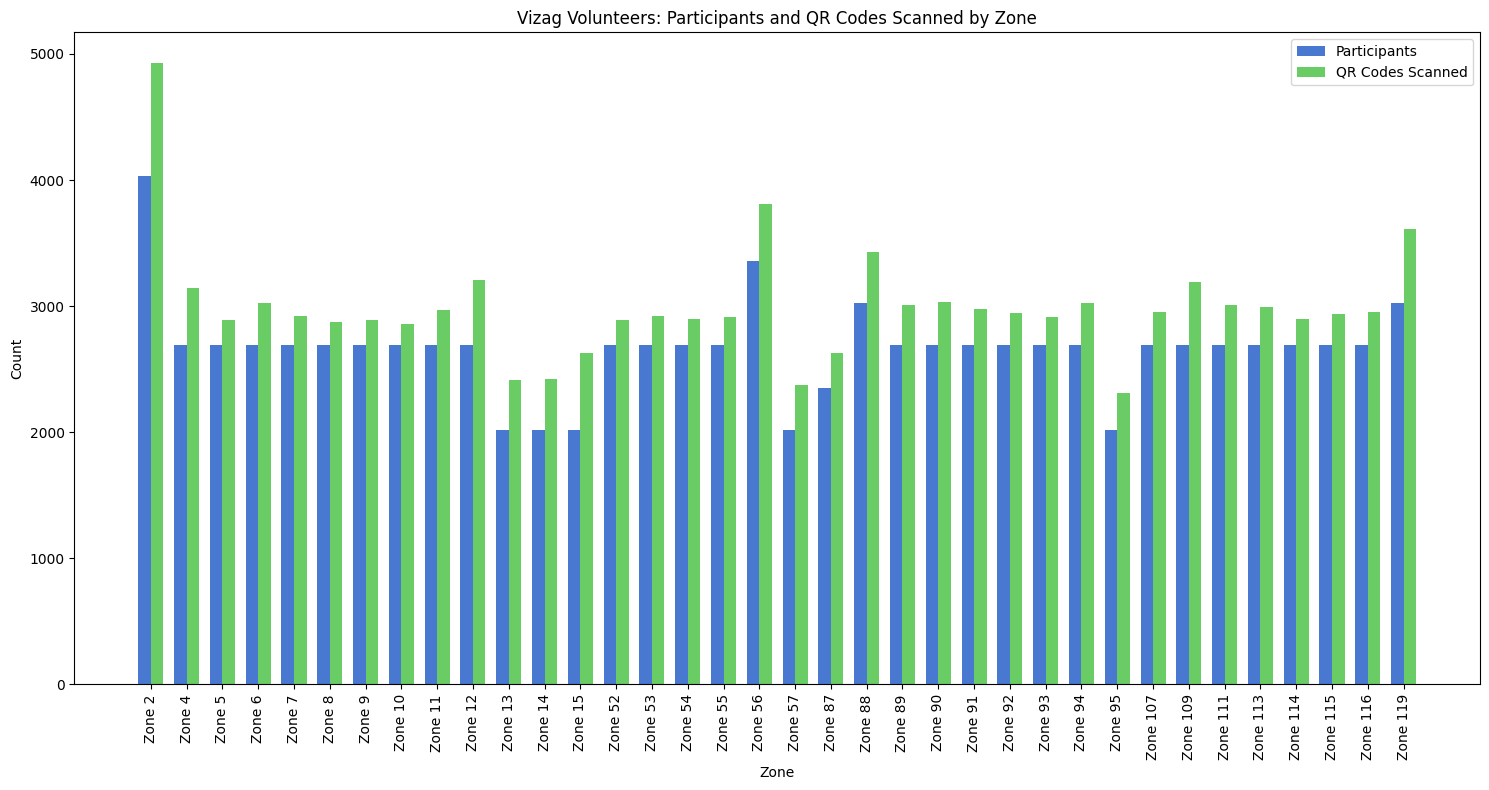

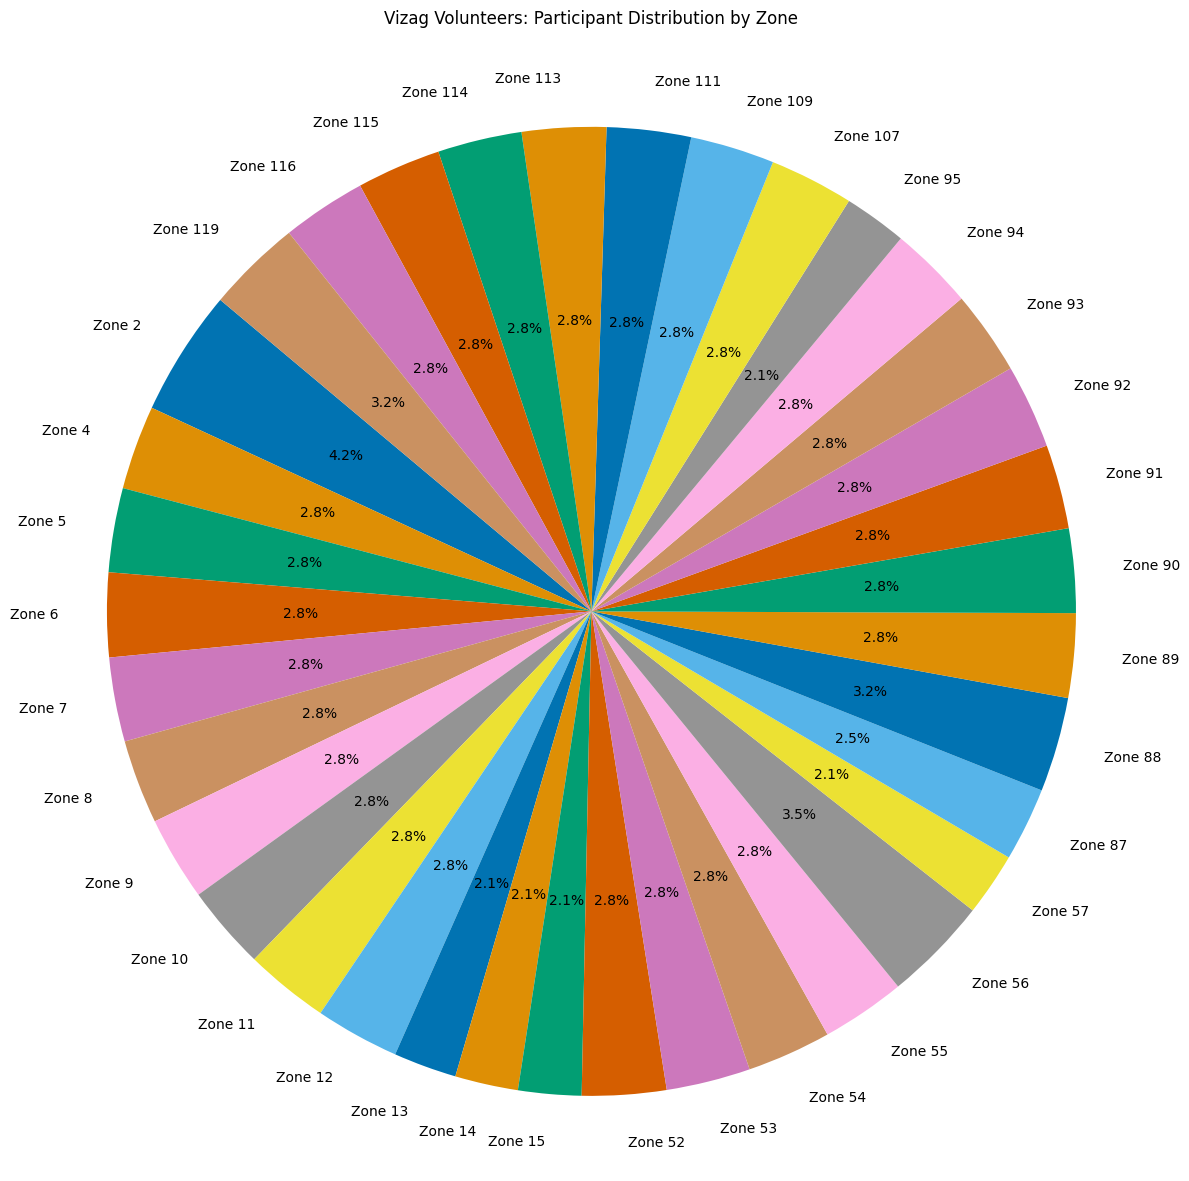


\begin{table}[h]
\caption{Top 5 Compartments by QR Codes Scanned for Vizag Volunteers}
\label{tab:top_compartments_vizag}
\begin{tabular}{llrr}
\toprule
Zone & Compartment Name & No of Participants & No of  QR's Scanned \\
\midrule
Zone 12 & Beach Road- Teneti Park & 1344 & 1769 \\
Zone 109 & Law College Road & 1344 & 1720 \\
Zone 4 & Beach Road- Park Hotel & 1344 & 1682 \\
Zone 6 & Beach Road - Kurupam Tomb & 1344 & 1551 \\
Zone 88 & GOKARTING LAND - II & 1344 & 1529 \\
\bottomrule
\end{tabular}
\end{table}



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files

try:
    # Specify the path to the CSV file
    CSV_FILE = "/content/Vizag Volunteers - Sheet1.csv"

    # Check if the file exists
    if not os.path.exists(CSV_FILE):
        raise FileNotFoundError(f"CSV file not found at {CSV_FILE}. Please upload it to the Colab environment.")

    # Read the CSV file
    try:
        df = pd.read_csv(CSV_FILE)
        print(f"Successfully read file: {CSV_FILE}")
    except Exception as e:
        print(f"Error reading CSV file: {str(e)}")
        raise e

    # Ensure numeric columns are properly typed
    numeric_columns = ['No of Participants', 'No of QR Codes Given', 'No of  QR\'s Scanned']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Check for missing or non-numeric data
    if df[numeric_columns].isna().any().any():
        print("Warning: Missing or non-numeric data found. NaN values will be treated as 0.")
        df.fillna(0, inplace=True)

    # Calculate key metrics
    total_participants = df['No of Participants'].sum()
    total_qr_given = df['No of QR Codes Given'].sum()
    total_qr_scanned = df['No of  QR\'s Scanned'].sum()
    scan_rate = (total_qr_scanned / total_qr_given * 100) if total_qr_given > 0 else 0

    # Group by Zone for analysis, preserving original order
    zone_summary = df.groupby('Zone').agg({
        'No of Participants': 'sum',
        'No of QR Codes Given': 'sum',
        'No of  QR\'s Scanned': 'sum',
        'Compartments': 'count'
    }).reset_index()
    # Sort zones as they appear in the data
    zone_order = df['Zone'].drop_duplicates().tolist()
    zone_summary['Zone'] = pd.Categorical(zone_summary['Zone'], categories=zone_order, ordered=True)
    zone_summary = zone_summary.sort_values('Zone').reset_index(drop=True)

    # Print summary statistics
    print("\nAnalysis for Vizag Volunteers:")
    print(f"Total Participants: {total_participants:,}")
    print(f"Total QR Codes Given: {total_qr_given:,}")
    print(f"Total QR Codes Scanned: {total_qr_scanned:,}")
    print(f"QR Code Scan Rate: {scan_rate:.2f}%")

    # Zone-wise Summary as clean LaTeX table
    zone_latex = zone_summary.to_latex(
        column_format='llrrr',
        caption='Zone-wise Summary for Vizag Volunteers',
        label='tab:zone_summary_vizag',
        position='h',
        index=False
    )
    print("\n" + zone_latex)

    # Visualization 1: Bar Chart (Participants and QR Codes Scanned by Zone)
    plt.figure(figsize=(15, 8))
    bar_width = 0.35
    x = range(len(zone_summary))
    plt.bar(x, zone_summary['No of Participants'], width=bar_width, label='Participants', color=sns.color_palette("muted")[0])
    plt.bar([i + bar_width for i in x], zone_summary['No of  QR\'s Scanned'], width=bar_width, label='QR Codes Scanned', color=sns.color_palette("muted")[2])
    plt.xlabel('Zone')
    plt.ylabel('Count')
    plt.title('Vizag Volunteers: Participants and QR Codes Scanned by Zone')
    plt.xticks([i + bar_width/2 for i in x], zone_summary['Zone'], rotation=90)
    plt.legend()
    plt.tight_layout()
    bar_file = 'participant_distribution_vizag_volunteers.png'
    plt.savefig(bar_file, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # Visualization 2: Pie Chart (Participant Distribution by Zone) with professional colors
    plt.figure(figsize=(12, 12))
    colors = sns.color_palette("colorblind", len(zone_summary))
    plt.pie(zone_summary['No of Participants'], labels=zone_summary['Zone'], autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 10})
    plt.title('Vizag Volunteers: Participant Distribution by Zone', pad=20)
    plt.axis('equal')
    plt.tight_layout()
    pie_file = 'zone_distribution_vizag_volunteers.png'
    plt.savefig(pie_file, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # Top 5 Compartments as clean LaTeX table
    top_compartments = df.nlargest(5, 'No of  QR\'s Scanned')[['Zone', 'Compartment Name', 'No of Participants', 'No of  QR\'s Scanned']].reset_index(drop=True)
    top_latex = top_compartments.to_latex(
        column_format='llrr',
        caption='Top 5 Compartments by QR Codes Scanned for Vizag Volunteers',
        label='tab:top_compartments_vizag',
        position='h',
        index=False
    )
    print("\n" + top_latex)

    # Download the generated visualizations
    for file in [bar_file, pie_file]:
        if os.path.exists(file):
            print(f"Downloading {file}")
            files.download(file)
        else:
            print(f"File {file} not generated.")

except Exception as e:
    print(f"Error during execution: {str(e)}")

Successfully read file: /content/NCC QR - Sheet1.csv

Analysis for NCC:
Total Participants: 58,800
Total QR Codes Given: 69,500
Total QR Codes Scanned: 68,647
QR Code Scan Rate: 98.77%

\begin{table}[h]
\caption{Zone-wise Summary for NCC}
\label{tab:zone_summary_vizag}
\begin{tabular}{llrrr}
\toprule
Zone & No of Participants & No of QR Codes Given & No of  QR's Scanned & Compartments \\
\midrule
Zone 1 & 3024 & 3750 & 4100 & 3 \\
Zone 37 & 2016 & 3300 & 2282 & 3 \\
Zone 38 & 2016 & 2850 & 2838 & 3 \\
Zone 39 & 2016 & 2400 & 2316 & 3 \\
Zone 40 & 2016 & 2400 & 2111 & 3 \\
Zone 41 & 2016 & 2400 & 2259 & 3 \\
Zone 42 & 2016 & 2400 & 2324 & 3 \\
Zone 43 & 2016 & 2400 & 2170 & 3 \\
Zone 44 & 2016 & 2400 & 2298 & 3 \\
Zone 45 & 2016 & 2400 & 2691 & 3 \\
Zone 58 & 2688 & 3000 & 2916 & 2 \\
Zone 59 & 2688 & 3000 & 3038 & 2 \\
Zone 60 & 2688 & 3000 & 3028 & 2 \\
Zone 61 & 2688 & 3000 & 3047 & 2 \\
Zone 62 & 2688 & 3000 & 3066 & 2 \\
Zone 63 & 2688 & 3000 & 3036 & 2 \\
Zone 64 & 2688 & 3000 & 2

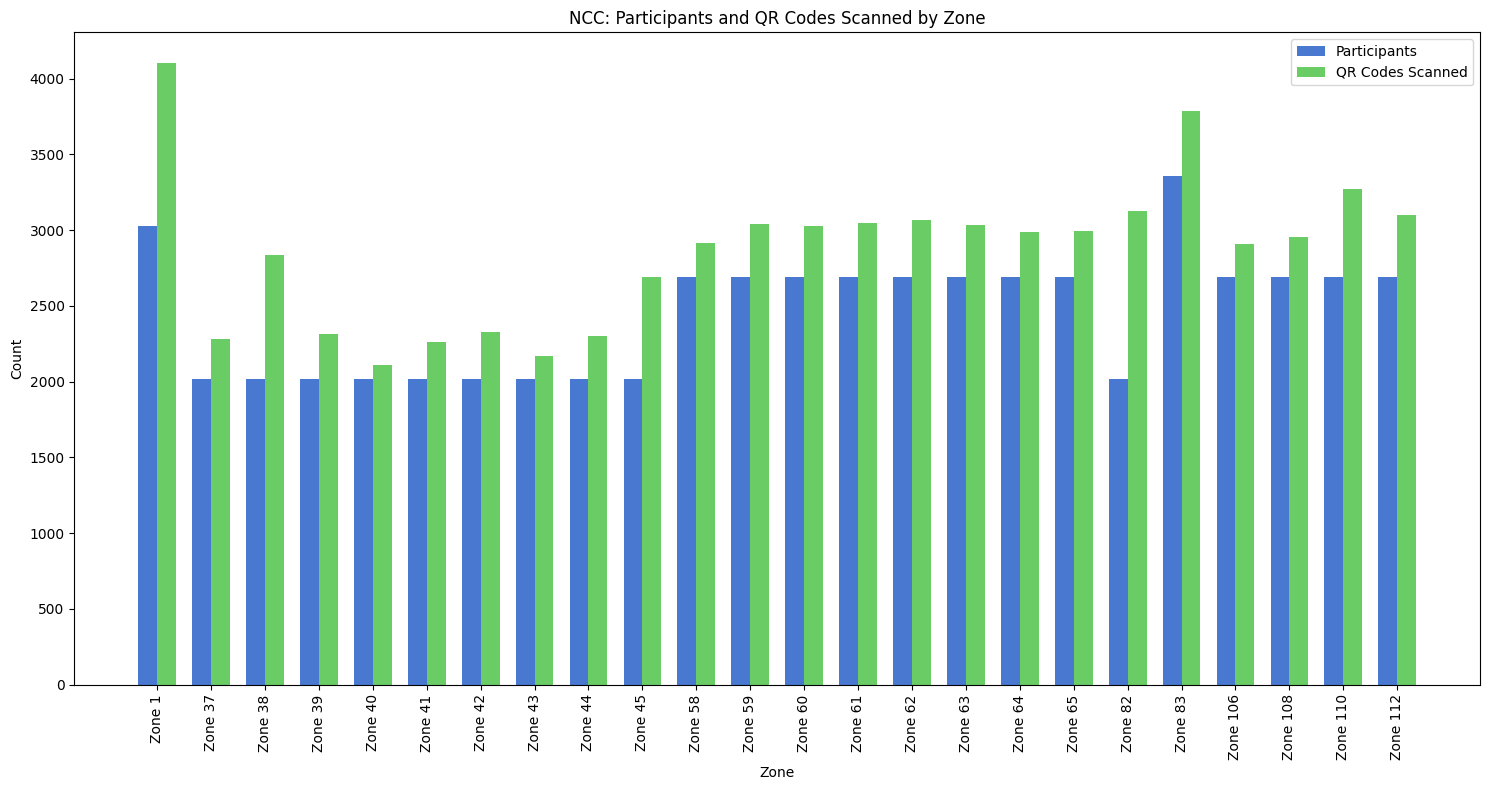

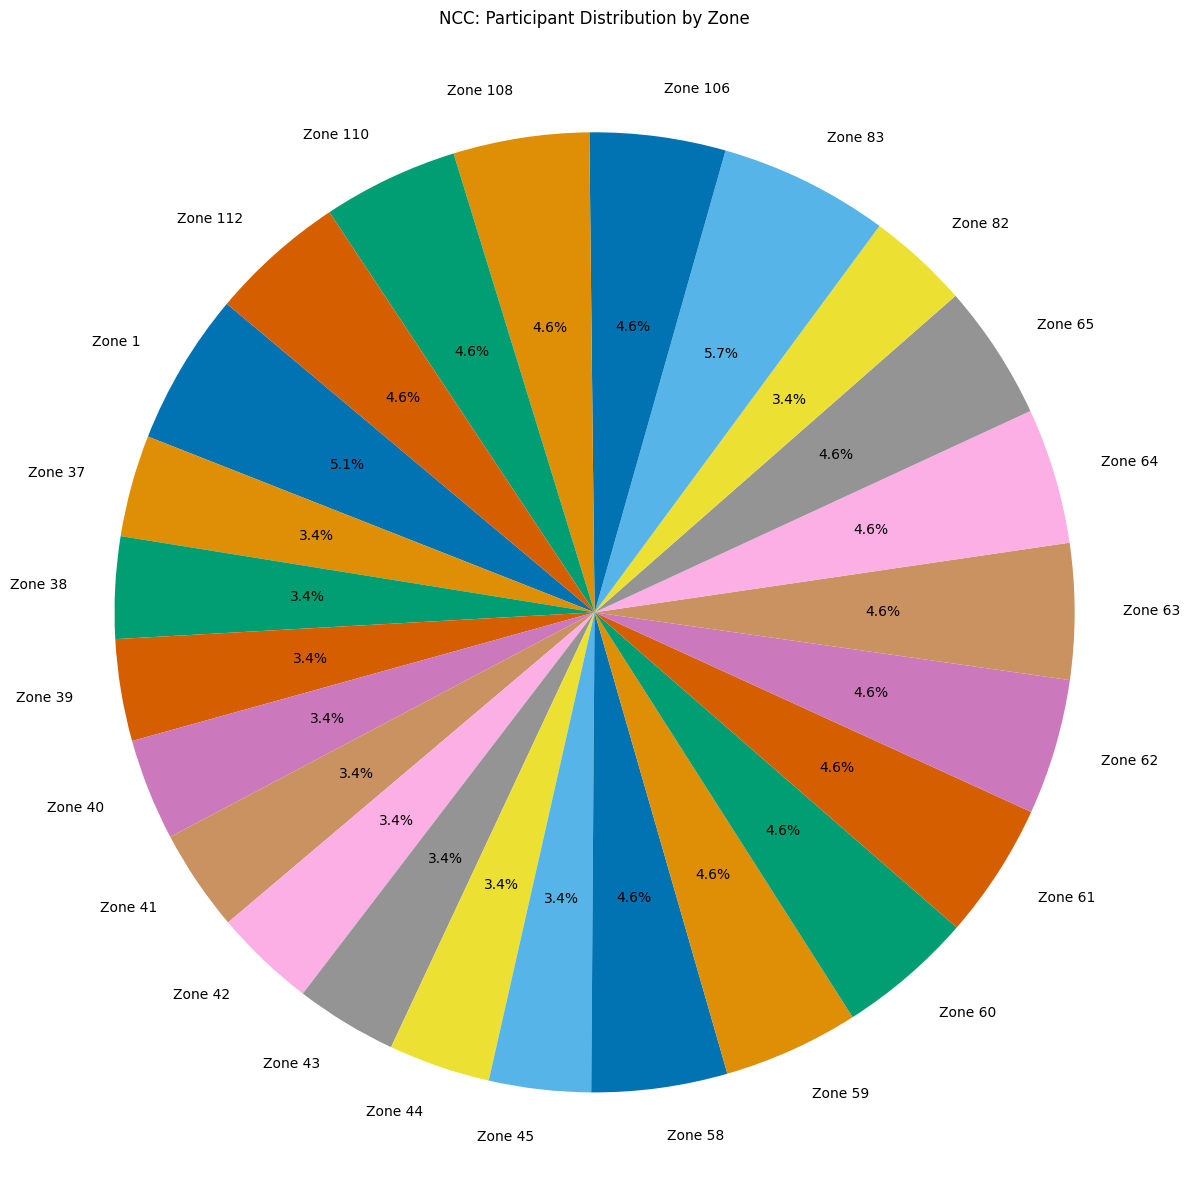


\begin{table}[h]
\caption{Top 5 Compartments by QR Codes Scanned for NCC}
\label{tab:top_compartments_vizag}
\begin{tabular}{llrr}
\toprule
Zone & Compartment Name & No of Participants & No of  QR's Scanned \\
\midrule
Zone 110 & Law College Road & 1344 & 1935 \\
Zone 1 & Beach Road- Main Venue & 1008 & 1658 \\
Zone 112 & Law College Road & 1344 & 1611 \\
Zone 62 & GITAM COLLEGE & 1344 & 1603 \\
Zone 61 & GITAM COLLEGE & 1344 & 1591 \\
\bottomrule
\end{tabular}
\end{table}



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files

try:
    # Specify the path to the CSV file
    CSV_FILE = "/content/NCC QR - Sheet1.csv"

    # Check if the file exists
    if not os.path.exists(CSV_FILE):
        raise FileNotFoundError(f"CSV file not found at {CSV_FILE}. Please upload it to the Colab environment.")

    # Read the CSV file
    try:
        df = pd.read_csv(CSV_FILE)
        print(f"Successfully read file: {CSV_FILE}")
    except Exception as e:
        print(f"Error reading CSV file: {str(e)}")
        raise e

    # Ensure numeric columns are properly typed
    numeric_columns = ['No of Participants', 'No of QR Codes Given', 'No of  QR\'s Scanned']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Check for missing or non-numeric data
    if df[numeric_columns].isna().any().any():
        print("Warning: Missing or non-numeric data found. NaN values will be treated as 0.")
        df.fillna(0, inplace=True)

    # Calculate key metrics
    total_participants = df['No of Participants'].sum()
    total_qr_given = df['No of QR Codes Given'].sum()
    total_qr_scanned = df['No of  QR\'s Scanned'].sum()
    scan_rate = (total_qr_scanned / total_qr_given * 100) if total_qr_given > 0 else 0

    # Group by Zone for analysis, preserving original order
    zone_summary = df.groupby('Zone').agg({
        'No of Participants': 'sum',
        'No of QR Codes Given': 'sum',
        'No of  QR\'s Scanned': 'sum',
        'Compartments': 'count'
    }).reset_index()
    # Sort zones as they appear in the data
    zone_order = df['Zone'].drop_duplicates().tolist()
    zone_summary['Zone'] = pd.Categorical(zone_summary['Zone'], categories=zone_order, ordered=True)
    zone_summary = zone_summary.sort_values('Zone').reset_index(drop=True)

    # Print summary statistics
    print("\nAnalysis for NCC:")
    print(f"Total Participants: {total_participants:,}")
    print(f"Total QR Codes Given: {total_qr_given:,}")
    print(f"Total QR Codes Scanned: {total_qr_scanned:,}")
    print(f"QR Code Scan Rate: {scan_rate:.2f}%")

    # Zone-wise Summary as clean LaTeX table
    zone_latex = zone_summary.to_latex(
        column_format='llrrr',
        caption='Zone-wise Summary for NCC',
        label='tab:zone_summary_vizag',
        position='h',
        index=False
    )
    print("\n" + zone_latex)

    # Visualization 1: Bar Chart (Participants and QR Codes Scanned by Zone)
    plt.figure(figsize=(15, 8))
    bar_width = 0.35
    x = range(len(zone_summary))
    plt.bar(x, zone_summary['No of Participants'], width=bar_width, label='Participants', color=sns.color_palette("muted")[0])
    plt.bar([i + bar_width for i in x], zone_summary['No of  QR\'s Scanned'], width=bar_width, label='QR Codes Scanned', color=sns.color_palette("muted")[2])
    plt.xlabel('Zone')
    plt.ylabel('Count')
    plt.title('NCC: Participants and QR Codes Scanned by Zone')
    plt.xticks([i + bar_width/2 for i in x], zone_summary['Zone'], rotation=90)
    plt.legend()
    plt.tight_layout()
    bar_file = 'participant_distribution_NCC.png'
    plt.savefig(bar_file, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # Visualization 2: Pie Chart (Participant Distribution by Zone) with professional colors
    plt.figure(figsize=(12, 12))
    colors = sns.color_palette("colorblind", len(zone_summary))
    plt.pie(zone_summary['No of Participants'], labels=zone_summary['Zone'], autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 10})
    plt.title('NCC: Participant Distribution by Zone', pad=20)
    plt.axis('equal')
    plt.tight_layout()
    pie_file = 'zone_distribution_NCC.png'
    plt.savefig(pie_file, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # Top 5 Compartments as clean LaTeX table
    top_compartments = df.nlargest(5, 'No of  QR\'s Scanned')[['Zone', 'Compartment Name', 'No of Participants', 'No of  QR\'s Scanned']].reset_index(drop=True)
    top_latex = top_compartments.to_latex(
        column_format='llrr',
        caption='Top 5 Compartments by QR Codes Scanned for NCC',
        label='tab:top_compartments_vizag',
        position='h',
        index=False
    )
    print("\n" + top_latex)

    # Download the generated visualizations
    for file in [bar_file, pie_file]:
        if os.path.exists(file):
            print(f"Downloading {file}")
            files.download(file)
        else:
            print(f"File {file} not generated.")

except Exception as e:
    print(f"Error during execution: {str(e)}")

Successfully read file: /content/NSS QR  - Sheet1.csv

Analysis for NSS:
Total Participants: 21,840
Total QR Codes Given: 23,250
Total QR Codes Scanned: 23,116
QR Code Scan Rate: 99.42%

\begin{table}[h]
\caption{Zone-wise Summary for NSS}
\label{tab:zone_summary_vizag}
\begin{tabular}{llrrr}
\toprule
Zone & No of Participants & No of QR Codes Given & No of  QR's Scanned & Compartments \\
\midrule
Zone 3 & 3024 & 3750 & 5614 & 3 \\
Zone 16 & 2016 & 2400 & 2028 & 3 \\
Zone 17 & 2016 & 2400 & 2206 & 3 \\
Zone 18 & 2016 & 2400 & 2681 & 3 \\
Zone 77 & 2688 & 2300 & 3026 & 2 \\
Zone 78 & 2688 & 1600 & 2214 & 2 \\
Zone 79 & 2016 & 2300 & 1808 & 2 \\
Zone 80 & 2688 & 3000 & 1163 & 2 \\
Zone 81 & 2688 & 3100 & 2376 & 3 \\
\bottomrule
\end{tabular}
\end{table}



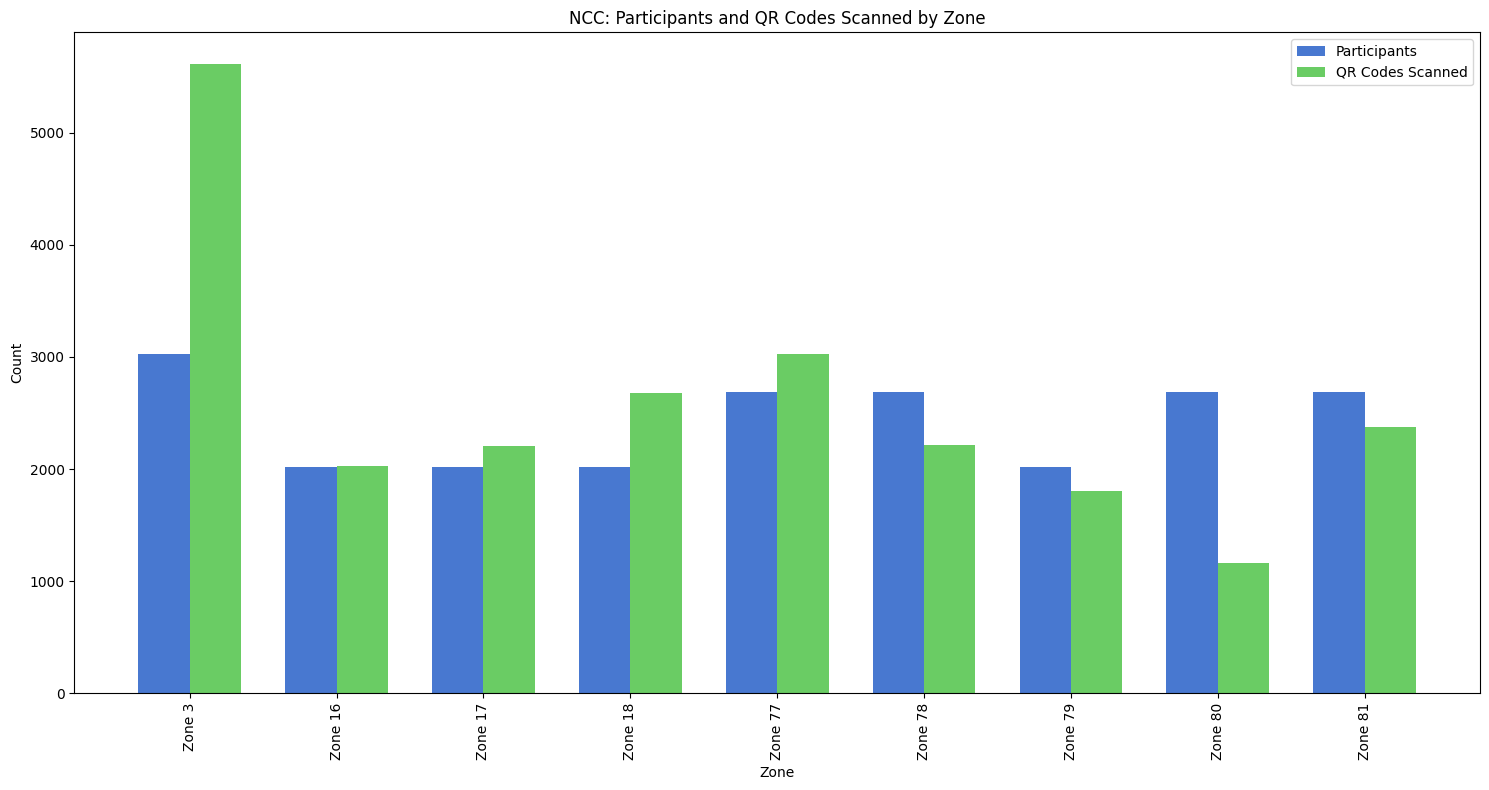

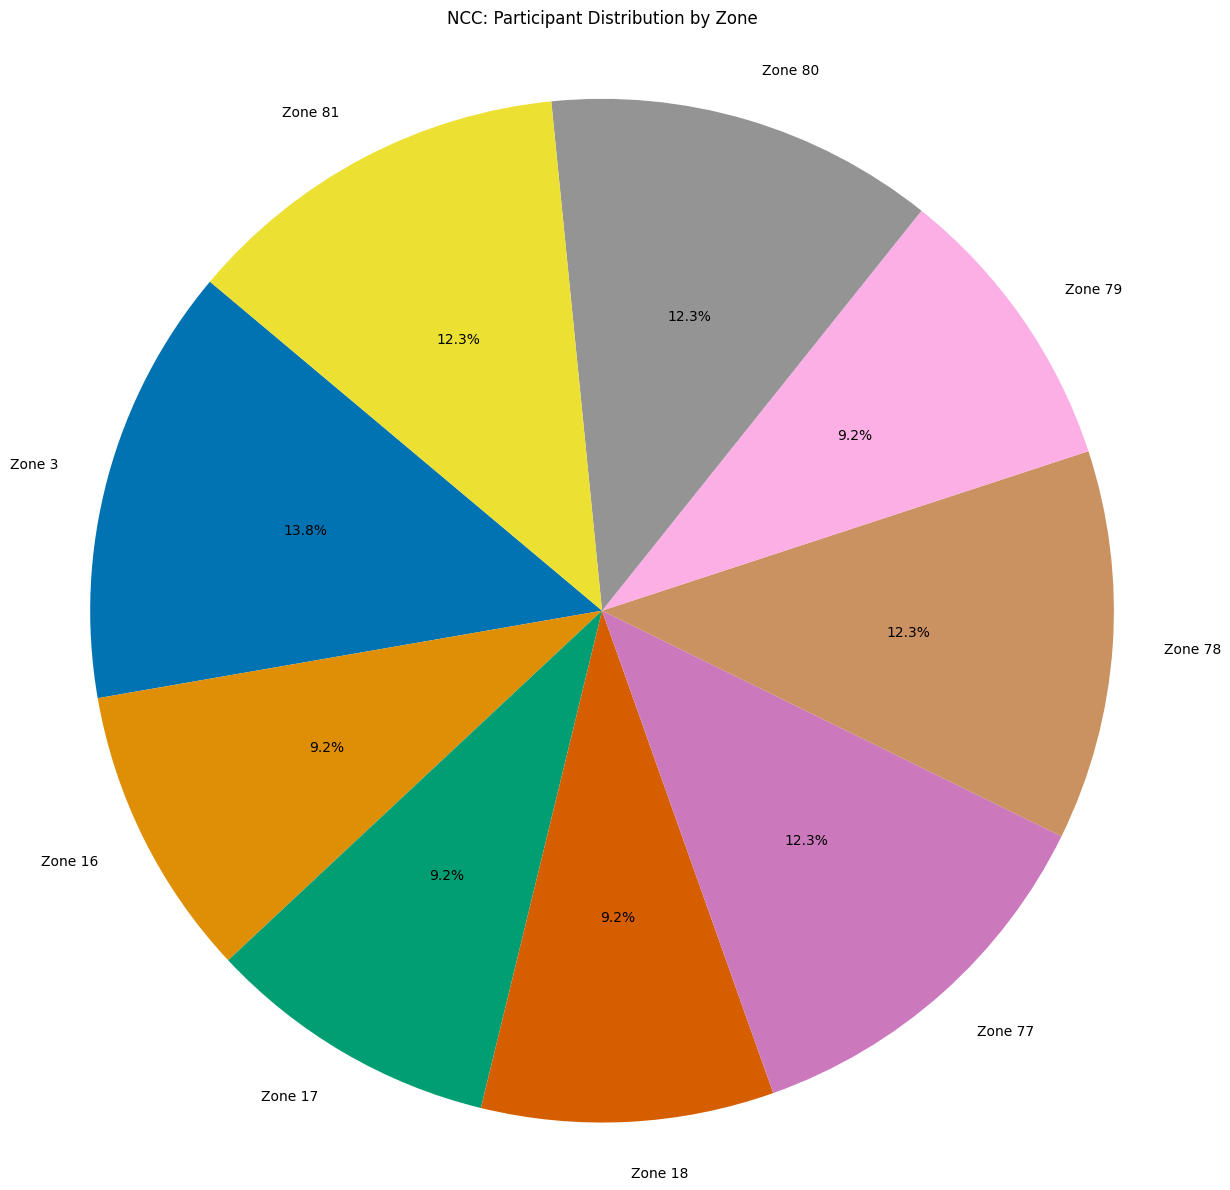


\begin{table}[h]
\caption{Top 8 Compartments by QR Codes Scanned for NSS}
\label{tab:top_compartments_vizag}
\begin{tabular}{llrr}
\toprule
Zone & Compartment Name & No of Participants & No of  QR's Scanned \\
\midrule
Zone 3 & Beach Road- Main Venue & 1008 & 1988 \\
Zone 3 & Beach Road- Main Venue & 1008 & 1972 \\
Zone 3 & Beach Road- Main Venue & 1008 & 1654 \\
Zone 77 & IT SEZ VACANT LAND & 1344 & 1560 \\
Zone 77 & IT SEZ VACANT LAND & 1344 & 1466 \\
Zone 18 & Beach Road - ISKON & 672 & 1188 \\
Zone 78 & IT SEZ VACANT LAND & 1344 & 1158 \\
Zone 78 & IT SEZ VACANT LAND & 1344 & 1056 \\
Zone 79 & VMRDA LAND & 1344 & 1011 \\
\bottomrule
\end{tabular}
\end{table}



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files

try:
    # Specify the path to the CSV file
    CSV_FILE = "/content/NSS QR  - Sheet1.csv"

    # Check if the file exists
    if not os.path.exists(CSV_FILE):
        raise FileNotFoundError(f"CSV file not found at {CSV_FILE}. Please upload it to the Colab environment.")

    # Read the CSV file
    try:
        df = pd.read_csv(CSV_FILE)
        print(f"Successfully read file: {CSV_FILE}")
    except Exception as e:
        print(f"Error reading CSV file: {str(e)}")
        raise e

    # Ensure numeric columns are properly typed
    numeric_columns = ['No of Participants', 'No of QR Codes Given', 'No of  QR\'s Scanned']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Check for missing or non-numeric data
    if df[numeric_columns].isna().any().any():
        print("Warning: Missing or non-numeric data found. NaN values will be treated as 0.")
        df.fillna(0, inplace=True)

    # Calculate key metrics
    total_participants = df['No of Participants'].sum()
    total_qr_given = df['No of QR Codes Given'].sum()
    total_qr_scanned = df['No of  QR\'s Scanned'].sum()
    scan_rate = (total_qr_scanned / total_qr_given * 100) if total_qr_given > 0 else 0

    # Group by Zone for analysis, preserving original order
    zone_summary = df.groupby('Zone').agg({
        'No of Participants': 'sum',
        'No of QR Codes Given': 'sum',
        'No of  QR\'s Scanned': 'sum',
        'Compartments': 'count'
    }).reset_index()
    # Sort zones as they appear in the data
    zone_order = df['Zone'].drop_duplicates().tolist()
    zone_summary['Zone'] = pd.Categorical(zone_summary['Zone'], categories=zone_order, ordered=True)
    zone_summary = zone_summary.sort_values('Zone').reset_index(drop=True)

    # Print summary statistics
    print("\nAnalysis for NSS:")
    print(f"Total Participants: {total_participants:,}")
    print(f"Total QR Codes Given: {total_qr_given:,}")
    print(f"Total QR Codes Scanned: {total_qr_scanned:,}")
    print(f"QR Code Scan Rate: {scan_rate:.2f}%")

    # Zone-wise Summary as clean LaTeX table
    zone_latex = zone_summary.to_latex(
        column_format='llrrr',
        caption='Zone-wise Summary for NSS',
        label='tab:zone_summary_vizag',
        position='h',
        index=False
    )
    print("\n" + zone_latex)

    # Visualization 1: Bar Chart (Participants and QR Codes Scanned by Zone)
    plt.figure(figsize=(15, 8))
    bar_width = 0.35
    x = range(len(zone_summary))
    plt.bar(x, zone_summary['No of Participants'], width=bar_width, label='Participants', color=sns.color_palette("muted")[0])
    plt.bar([i + bar_width for i in x], zone_summary['No of  QR\'s Scanned'], width=bar_width, label='QR Codes Scanned', color=sns.color_palette("muted")[2])
    plt.xlabel('Zone')
    plt.ylabel('Count')
    plt.title('NCC: Participants and QR Codes Scanned by Zone')
    plt.xticks([i + bar_width/2 for i in x], zone_summary['Zone'], rotation=90)
    plt.legend()
    plt.tight_layout()
    bar_file = 'participant_distribution_NSS.png'
    plt.savefig(bar_file, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # Visualization 2: Pie Chart (Participant Distribution by Zone) with professional colors
    plt.figure(figsize=(12, 12))
    colors = sns.color_palette("colorblind", len(zone_summary))
    plt.pie(zone_summary['No of Participants'], labels=zone_summary['Zone'], autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 10})
    plt.title('NCC: Participant Distribution by Zone', pad=20)
    plt.axis('equal')
    plt.tight_layout()
    pie_file = 'zone_distribution_NSS.png'
    plt.savefig(pie_file, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # Top 8 Compartments as clean LaTeX table
    top_compartments = df.nlargest(9, 'No of  QR\'s Scanned')[['Zone', 'Compartment Name', 'No of Participants', 'No of  QR\'s Scanned']].reset_index(drop=True)
    top_latex = top_compartments.to_latex(
        column_format='llrr',
        caption='Top 8 Compartments by QR Codes Scanned for NSS',
        label='tab:top_compartments_vizag',
        position='h',
        index=False
    )
    print("\n" + top_latex)

    # Download the generated visualizations
    for file in [bar_file, pie_file]:
        if os.path.exists(file):
            print(f"Downloading {file}")
            files.download(file)
        else:
            print(f"File {file} not generated.")

except Exception as e:
    print(f"Error during execution: {str(e)}")

Successfully read file: /content/NCC QR - Sheet1.csv

Analysis for NCC:
Total Participants: 58,800
Total QR Codes Given: 69,500
Total QR Codes Scanned: 68,647
QR Code Scan Rate: 98.77%

\begin{table}[h]
\caption{Zone-wise Summary for NCC}
\label{tab:zone_summary_vizag}
\begin{tabular}{llrrr}
\toprule
Zone & No of Participants & No of QR Codes Given & No of  QR's Scanned & Compartments \\
\midrule
Zone 1 & 3024 & 3750 & 4100 & 3 \\
Zone 37 & 2016 & 3300 & 2282 & 3 \\
Zone 38 & 2016 & 2850 & 2838 & 3 \\
Zone 39 & 2016 & 2400 & 2316 & 3 \\
Zone 40 & 2016 & 2400 & 2111 & 3 \\
Zone 41 & 2016 & 2400 & 2259 & 3 \\
Zone 42 & 2016 & 2400 & 2324 & 3 \\
Zone 43 & 2016 & 2400 & 2170 & 3 \\
Zone 44 & 2016 & 2400 & 2298 & 3 \\
Zone 45 & 2016 & 2400 & 2691 & 3 \\
Zone 58 & 2688 & 3000 & 2916 & 2 \\
Zone 59 & 2688 & 3000 & 3038 & 2 \\
Zone 60 & 2688 & 3000 & 3028 & 2 \\
Zone 61 & 2688 & 3000 & 3047 & 2 \\
Zone 62 & 2688 & 3000 & 3066 & 2 \\
Zone 63 & 2688 & 3000 & 3036 & 2 \\
Zone 64 & 2688 & 3000 & 2

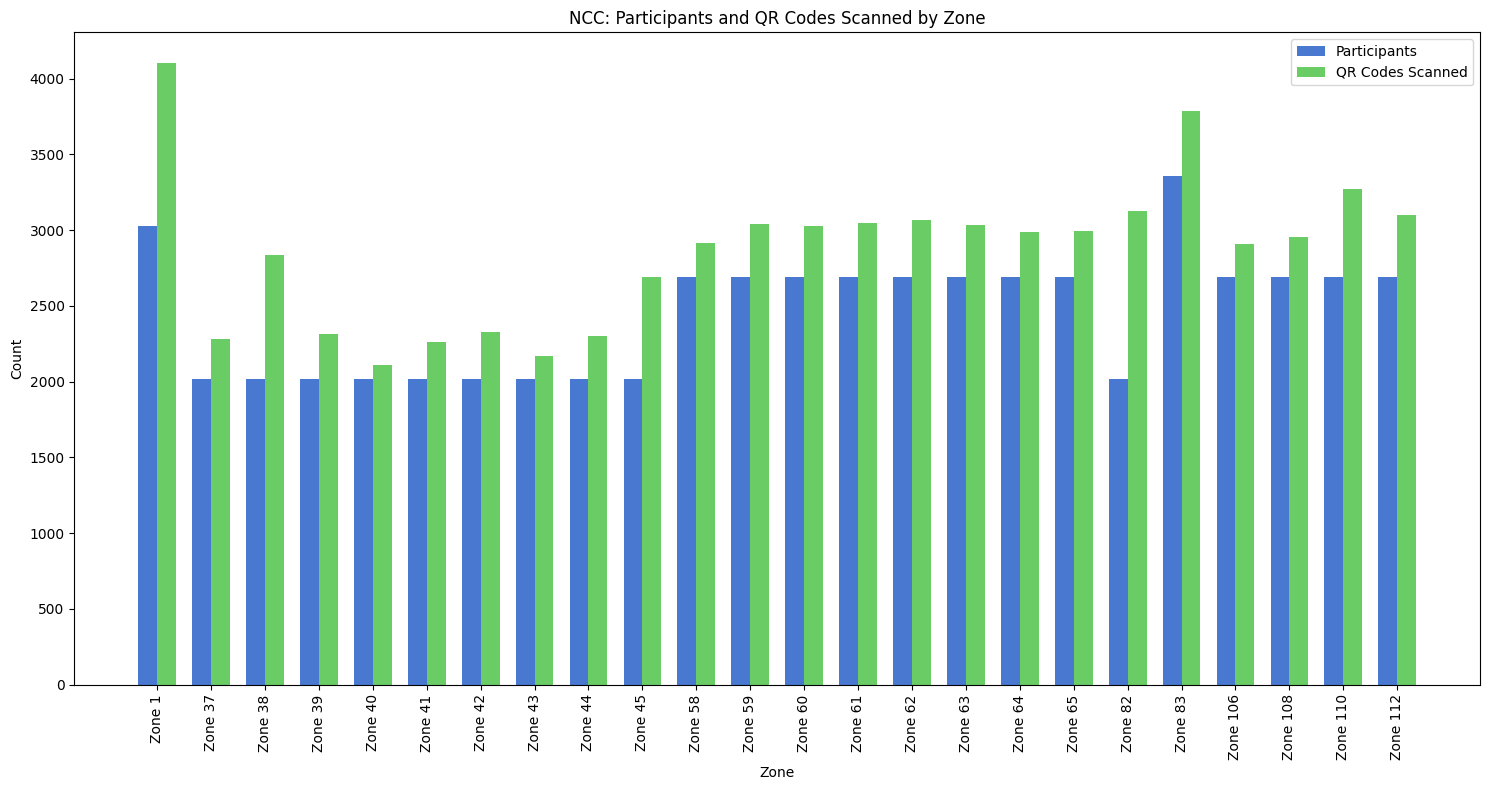

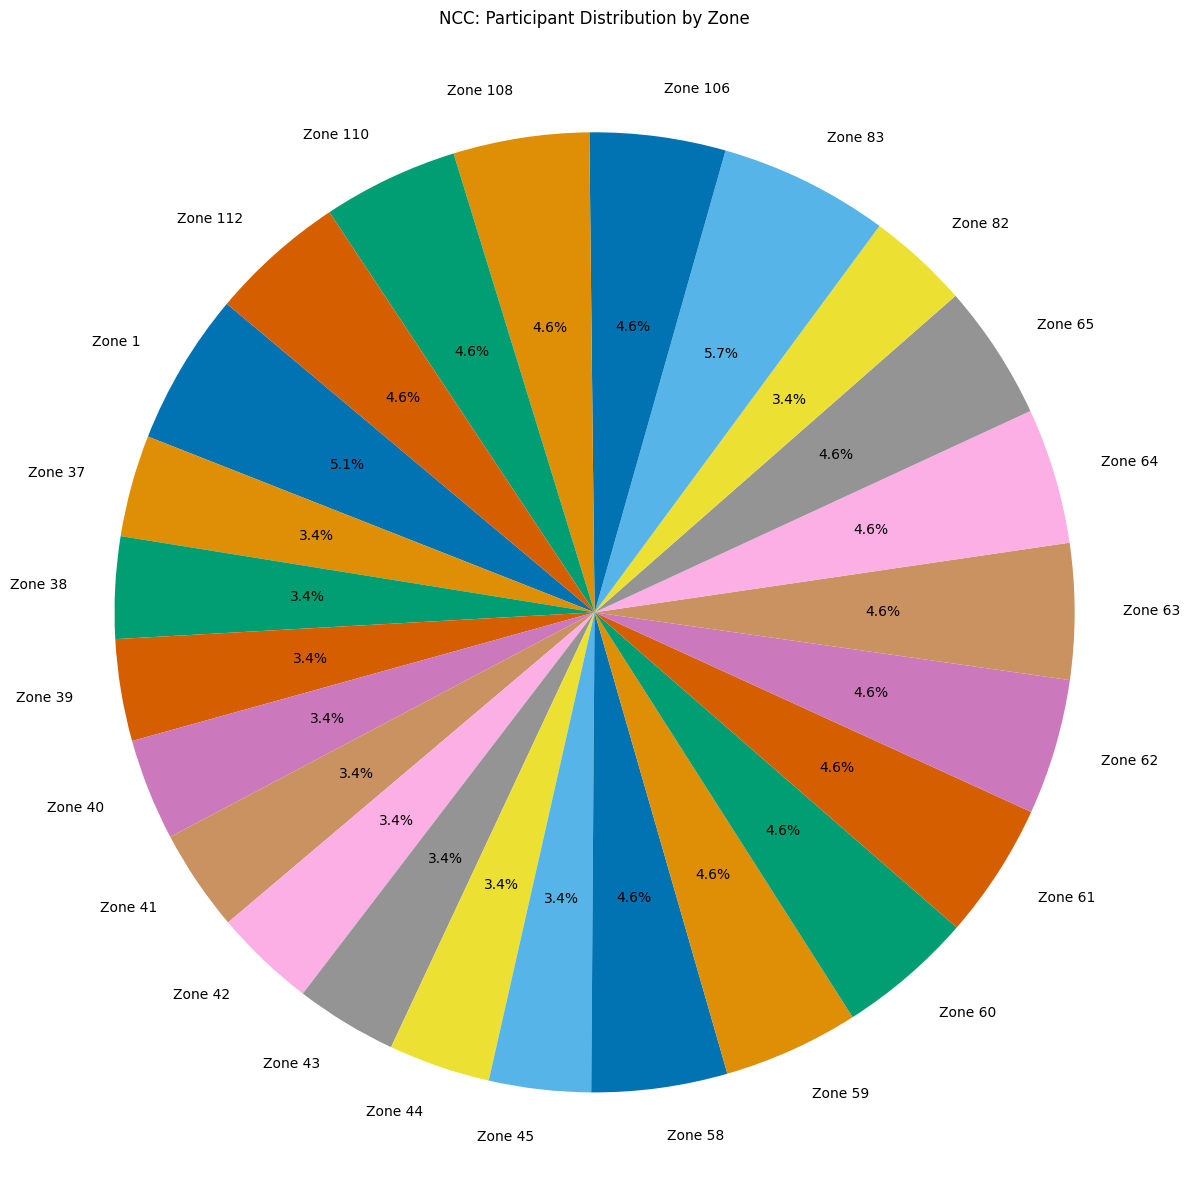


\begin{table}[h]
\caption{Top 5 Compartments by QR Codes Scanned for NCC}
\label{tab:top_compartments_vizag}
\begin{tabular}{llrr}
\toprule
Zone & Compartment Name & No of Participants & No of  QR's Scanned \\
\midrule
Zone 110 & Law College Road & 1344 & 1935 \\
Zone 1 & Beach Road- Main Venue & 1008 & 1658 \\
Zone 112 & Law College Road & 1344 & 1611 \\
Zone 62 & GITAM COLLEGE & 1344 & 1603 \\
Zone 61 & GITAM COLLEGE & 1344 & 1591 \\
\bottomrule
\end{tabular}
\end{table}



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files

try:
    # Specify the path to the CSV file
    CSV_FILE = "/content/NCC QR - Sheet1.csv"

    # Check if the file exists
    if not os.path.exists(CSV_FILE):
        raise FileNotFoundError(f"CSV file not found at {CSV_FILE}. Please upload it to the Colab environment.")

    # Read the CSV file
    try:
        df = pd.read_csv(CSV_FILE)
        print(f"Successfully read file: {CSV_FILE}")
    except Exception as e:
        print(f"Error reading CSV file: {str(e)}")
        raise e

    # Ensure numeric columns are properly typed
    numeric_columns = ['No of Participants', 'No of QR Codes Given', 'No of  QR\'s Scanned']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Check for missing or non-numeric data
    if df[numeric_columns].isna().any().any():
        print("Warning: Missing or non-numeric data found. NaN values will be treated as 0.")
        df.fillna(0, inplace=True)

    # Calculate key metrics
    total_participants = df['No of Participants'].sum()
    total_qr_given = df['No of QR Codes Given'].sum()
    total_qr_scanned = df['No of  QR\'s Scanned'].sum()
    scan_rate = (total_qr_scanned / total_qr_given * 100) if total_qr_given > 0 else 0

    # Group by Zone for analysis, preserving original order
    zone_summary = df.groupby('Zone').agg({
        'No of Participants': 'sum',
        'No of QR Codes Given': 'sum',
        'No of  QR\'s Scanned': 'sum',
        'Compartments': 'count'
    }).reset_index()
    # Sort zones as they appear in the data
    zone_order = df['Zone'].drop_duplicates().tolist()
    zone_summary['Zone'] = pd.Categorical(zone_summary['Zone'], categories=zone_order, ordered=True)
    zone_summary = zone_summary.sort_values('Zone').reset_index(drop=True)

    # Print summary statistics
    print("\nAnalysis for NCC:")
    print(f"Total Participants: {total_participants:,}")
    print(f"Total QR Codes Given: {total_qr_given:,}")
    print(f"Total QR Codes Scanned: {total_qr_scanned:,}")
    print(f"QR Code Scan Rate: {scan_rate:.2f}%")

    # Zone-wise Summary as clean LaTeX table
    zone_latex = zone_summary.to_latex(
        column_format='llrrr',
        caption='Zone-wise Summary for NCC',
        label='tab:zone_summary_vizag',
        position='h',
        index=False
    )
    print("\n" + zone_latex)

    # Visualization 1: Bar Chart (Participants and QR Codes Scanned by Zone)
    plt.figure(figsize=(15, 8))
    bar_width = 0.35
    x = range(len(zone_summary))
    plt.bar(x, zone_summary['No of Participants'], width=bar_width, label='Participants', color=sns.color_palette("muted")[0])
    plt.bar([i + bar_width for i in x], zone_summary['No of  QR\'s Scanned'], width=bar_width, label='QR Codes Scanned', color=sns.color_palette("muted")[2])
    plt.xlabel('Zone')
    plt.ylabel('Count')
    plt.title('NCC: Participants and QR Codes Scanned by Zone')
    plt.xticks([i + bar_width/2 for i in x], zone_summary['Zone'], rotation=90)
    plt.legend()
    plt.tight_layout()
    bar_file = 'participant_distribution_NCC.png'
    plt.savefig(bar_file, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # Visualization 2: Pie Chart (Participant Distribution by Zone) with professional colors
    plt.figure(figsize=(12, 12))
    colors = sns.color_palette("colorblind", len(zone_summary))
    plt.pie(zone_summary['No of Participants'], labels=zone_summary['Zone'], autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 10})
    plt.title('NCC: Participant Distribution by Zone', pad=20)
    plt.axis('equal')
    plt.tight_layout()
    pie_file = 'zone_distribution_NCC.png'
    plt.savefig(pie_file, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # Top 5 Compartments as clean LaTeX table
    top_compartments = df.nlargest(5, 'No of  QR\'s Scanned')[['Zone', 'Compartment Name', 'No of Participants', 'No of  QR\'s Scanned']].reset_index(drop=True)
    top_latex = top_compartments.to_latex(
        column_format='llrr',
        caption='Top 5 Compartments by QR Codes Scanned for NCC',
        label='tab:top_compartments_vizag',
        position='h',
        index=False
    )
    print("\n" + top_latex)

    # Download the generated visualizations
    for file in [bar_file, pie_file]:
        if os.path.exists(file):
            print(f"Downloading {file}")
            files.download(file)
        else:
            print(f"File {file} not generated.")

except Exception as e:
    print(f"Error during execution: {str(e)}")

Successfully read file: /content/DDUGKY QR - Sheet1.csv

Analysis for DDUGKY:
Total Participants: 109,872
Total QR Codes Given: 126,900
Total QR Codes Scanned: 109,183
QR Code Scan Rate: 86.04%

\begin{table}[h]
\caption{Zone-wise Summary for DDUGKY}
\label{tab:zone_summary_vizag}
\begin{tabular}{llrrr}
\toprule
Zone & No of Participants & No of QR Codes Given & No of  QR's Scanned & Compartments \\
\midrule
Zone 19 & 2016 & 2400 & 2107 & 3 \\
Zone 20 & 2016 & 2400 & 2183 & 3 \\
Zone 21 & 2016 & 2400 & 2267 & 3 \\
Zone 22 & 2016 & 2400 & 2303 & 3 \\
Zone 23 & 2016 & 2400 & 2174 & 3 \\
Zone 24 & 2016 & 2400 & 2255 & 3 \\
Zone 25 & 2016 & 2400 & 2113 & 3 \\
Zone 26 & 2016 & 2400 & 2620 & 3 \\
Zone 27 & 2016 & 2400 & 2209 & 3 \\
Zone 28 & 2016 & 2400 & 2092 & 3 \\
Zone 29 & 2016 & 2400 & 2202 & 3 \\
Zone 30 & 2016 & 2400 & 2090 & 3 \\
Zone 31 & 2016 & 2400 & 2188 & 3 \\
Zone 32 & 2016 & 2400 & 2369 & 3 \\
Zone 33 & 2016 & 2400 & 2275 & 3 \\
Zone 34 & 2016 & 2400 & 2363 & 3 \\
Zone 35 & 20

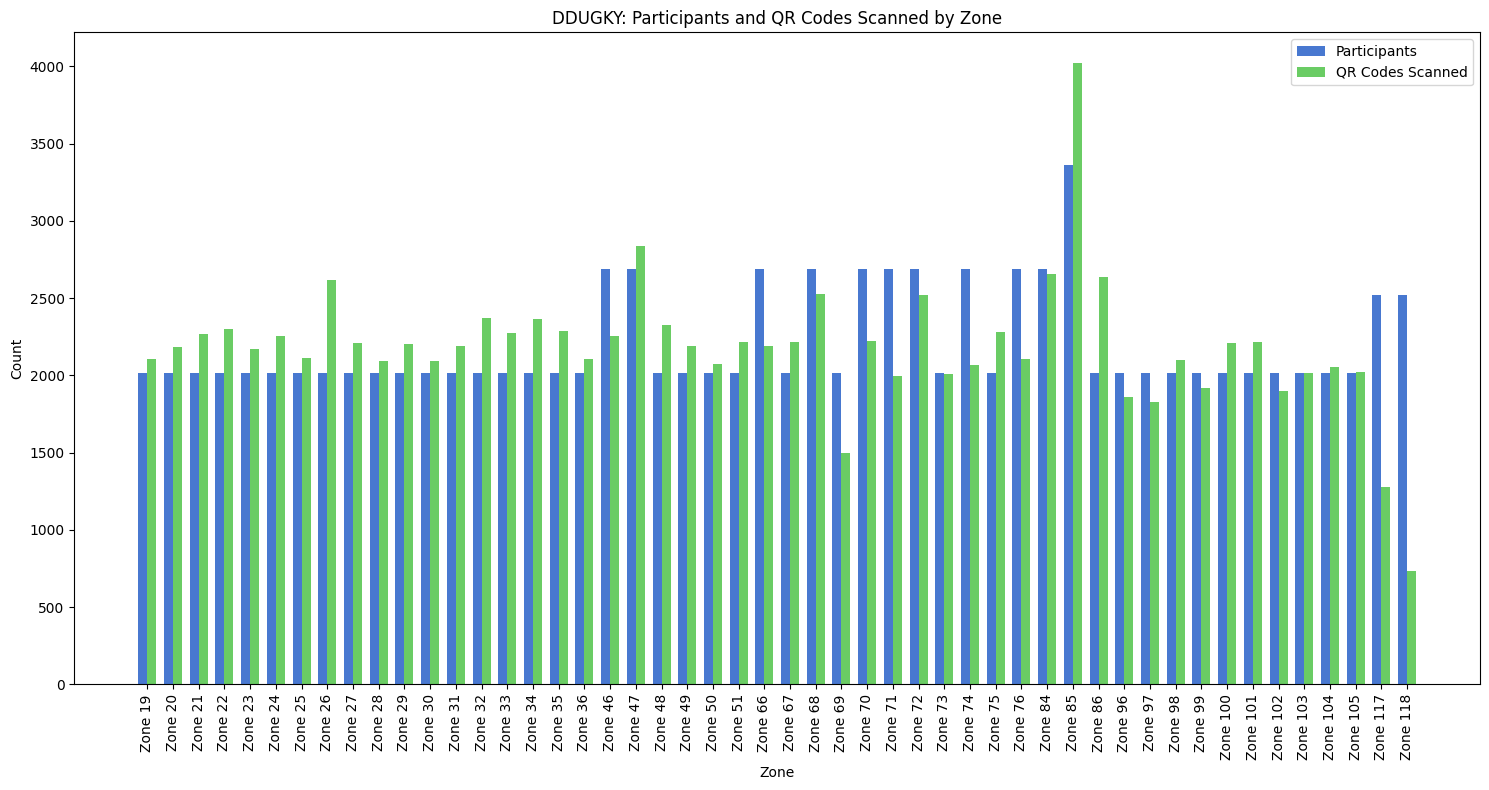

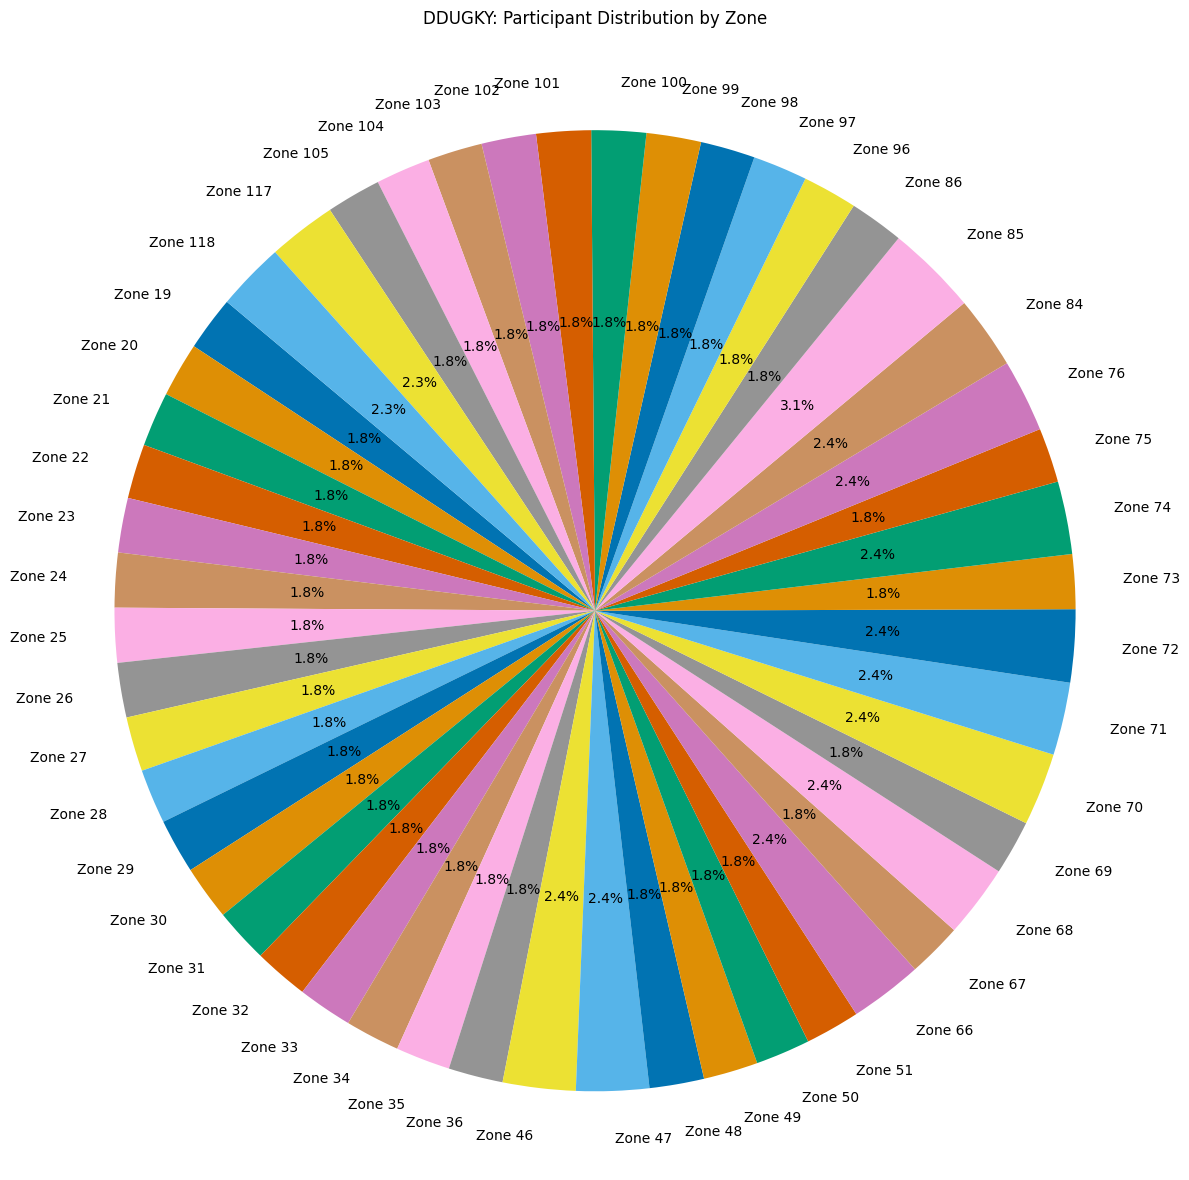


\begin{table}[h]
\caption{Top 5 Compartments by QR Codes Scanned for DDUGKY}
\label{tab:top_compartments_vizag}
\begin{tabular}{llrr}
\toprule
Zone & Compartment Name & No of Participants & No of  QR's Scanned \\
\midrule
Zone 84 & GREENDALE SCHOOL & 1344 & 1962 \\
Zone 48 & VIZAG CRICKET ACADEMY & 1344 & 1584 \\
Zone 85 & Thimmapuram & 1344 & 1552 \\
Zone 85 & Thimmapuram & 1344 & 1534 \\
Zone 73 & GG LAND & 1344 & 1498 \\
Zone 86 & KAPULUPPADA Gramakantham & 1344 & 1486 \\
\bottomrule
\end{tabular}
\end{table}



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files

try:
    # Specify the path to the CSV file
    CSV_FILE = "/content/DDUGKY QR - Sheet1.csv"

    # Check if the file exists
    if not os.path.exists(CSV_FILE):
        raise FileNotFoundError(f"CSV file not found at {CSV_FILE}. Please upload it to the Colab environment.")

    # Read the CSV file
    try:
        df = pd.read_csv(CSV_FILE)
        print(f"Successfully read file: {CSV_FILE}")
    except Exception as e:
        print(f"Error reading CSV file: {str(e)}")
        raise e

    # Ensure numeric columns are properly typed
    numeric_columns = ['No of Participants', 'No of QR Codes Given', 'No of  QR\'s Scanned']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Check for missing or non-numeric data
    if df[numeric_columns].isna().any().any():
        print("Warning: Missing or non-numeric data found. NaN values will be treated as 0.")
        df.fillna(0, inplace=True)

    # Calculate key metrics
    total_participants = df['No of Participants'].sum()
    total_qr_given = df['No of QR Codes Given'].sum()
    total_qr_scanned = df['No of  QR\'s Scanned'].sum()
    scan_rate = (total_qr_scanned / total_qr_given * 100) if total_qr_given > 0 else 0

    # Group by Zone for analysis, preserving original order
    zone_summary = df.groupby('Zone').agg({
        'No of Participants': 'sum',
        'No of QR Codes Given': 'sum',
        'No of  QR\'s Scanned': 'sum',
        'Compartments': 'count'
    }).reset_index()
    # Sort zones as they appear in the data
    zone_order = df['Zone'].drop_duplicates().tolist()
    zone_summary['Zone'] = pd.Categorical(zone_summary['Zone'], categories=zone_order, ordered=True)
    zone_summary = zone_summary.sort_values('Zone').reset_index(drop=True)

    # Print summary statistics
    print("\nAnalysis for DDUGKY:")
    print(f"Total Participants: {total_participants:,}")
    print(f"Total QR Codes Given: {total_qr_given:,}")
    print(f"Total QR Codes Scanned: {total_qr_scanned:,}")
    print(f"QR Code Scan Rate: {scan_rate:.2f}%")

    # Zone-wise Summary as clean LaTeX table
    zone_latex = zone_summary.to_latex(
        column_format='llrrr',
        caption='Zone-wise Summary for DDUGKY',
        label='tab:zone_summary_vizag',
        position='h',
        index=False
    )
    print("\n" + zone_latex)

    # Visualization 1: Bar Chart (Participants and QR Codes Scanned by Zone)
    plt.figure(figsize=(15, 8))
    bar_width = 0.35
    x = range(len(zone_summary))
    plt.bar(x, zone_summary['No of Participants'], width=bar_width, label='Participants', color=sns.color_palette("muted")[0])
    plt.bar([i + bar_width for i in x], zone_summary['No of  QR\'s Scanned'], width=bar_width, label='QR Codes Scanned', color=sns.color_palette("muted")[2])
    plt.xlabel('Zone')
    plt.ylabel('Count')
    plt.title('DDUGKY: Participants and QR Codes Scanned by Zone')
    plt.xticks([i + bar_width/2 for i in x], zone_summary['Zone'], rotation=90)
    plt.legend()
    plt.tight_layout()
    bar_file = 'participant_distribution_DDUGKY.png'
    plt.savefig(bar_file, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # Visualization 2: Pie Chart (Participant Distribution by Zone) with professional colors
    plt.figure(figsize=(12, 12))
    colors = sns.color_palette("colorblind", len(zone_summary))
    plt.pie(zone_summary['No of Participants'], labels=zone_summary['Zone'], autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 10})
    plt.title('DDUGKY: Participant Distribution by Zone', pad=20)
    plt.axis('equal')
    plt.tight_layout()
    pie_file = 'zone_distribution_DDUGKY.png'
    plt.savefig(pie_file, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # Top 5 Compartments as clean LaTeX table
    top_compartments = df.nlargest(6, 'No of  QR\'s Scanned')[['Zone', 'Compartment Name', 'No of Participants', 'No of  QR\'s Scanned']].reset_index(drop=True)
    top_latex = top_compartments.to_latex(
        column_format='llrr',
        caption='Top 5 Compartments by QR Codes Scanned for DDUGKY',
        label='tab:top_compartments_vizag',
        position='h',
        index=False
    )
    print("\n" + top_latex)

    # Download the generated visualizations
    for file in [bar_file, pie_file]:
        if os.path.exists(file):
            print(f"Downloading {file}")
            files.download(file)
        else:
            print(f"File {file} not generated.")

except Exception as e:
    print(f"Error during execution: {str(e)}")

Successfully read file: /content/Vizag Volunteers - Sheet1.csv


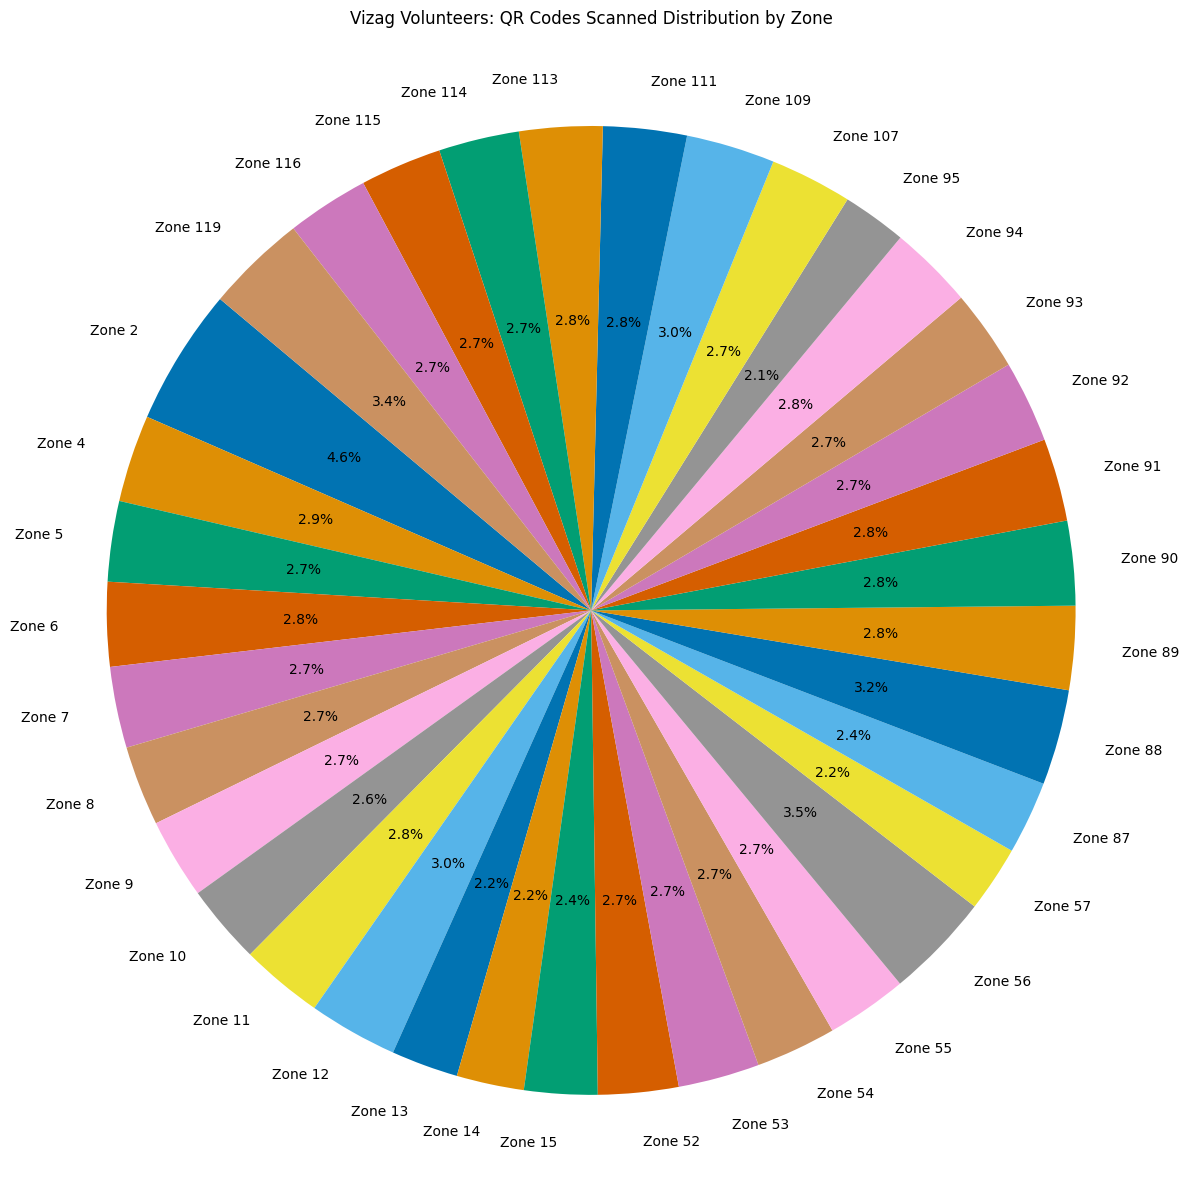

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files

CSV_FILE = "/content/Vizag Volunteers - Sheet1.csv"
org_name = "Vizag Volunteers"

try:
    # Check if the file exists
    if not os.path.exists(CSV_FILE):
        raise FileNotFoundError(f"CSV file not found at {CSV_FILE}. Please upload it to the Colab environment.")

    # Read the CSV file
    try:
        df = pd.read_csv(CSV_FILE)
        print(f"Successfully read file: {CSV_FILE}")
    except Exception as e:
        print(f"Error reading CSV file: {str(e)}")
        raise e

    # Ensure numeric columns are properly typed
    numeric_columns = ['No of Participants', 'No of QR Codes Given', 'No of  QR\'s Scanned']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Check for missing or non-numeric data
    if df[numeric_columns].isna().any().any():
        print("Warning: Missing or non-numeric data found. NaN values will be treated as 0.")
        df.fillna(0, inplace=True)

    # Group by Zone for analysis, preserving original order
    zone_summary = df.groupby('Zone').agg({
        'No of Participants': 'sum',
        'No of QR Codes Given': 'sum',
        'No of  QR\'s Scanned': 'sum',
        'Compartments': 'count'
    }).reset_index()
    # Sort zones as they appear in the data
    zone_order = df['Zone'].drop_duplicates().tolist()
    zone_summary['Zone'] = pd.Categorical(zone_summary['Zone'], categories=zone_order, ordered=True)
    zone_summary = zone_summary.sort_values('Zone').reset_index(drop=True)

    # Visualization 2: Pie Chart (QR Codes Scanned Distribution by Zone)
    plt.figure(figsize=(12, 12))
    colors = sns.color_palette("colorblind", len(zone_summary))
    plt.pie(zone_summary['No of  QR\'s Scanned'], labels=zone_summary['Zone'], autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 10})
    plt.title('{}: QR Codes Scanned Distribution by Zone'.format(org_name), pad=20)
    plt.axis('equal')
    plt.tight_layout()
    pie_file = 'zone_qr_scanned_{}.png'.format(org_name.lower().replace(" ", "_"))
    plt.savefig(pie_file, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # Download the generated visualization
    if os.path.exists(pie_file):
        print(f"Downloading {pie_file}")
        files.download(pie_file)
    else:
        print(f"File {pie_file} not generated.")

except Exception as e:
    print(f"Error during execution: {str(e)}")

Successfully read file: /content/NCC QR - Sheet1.csv


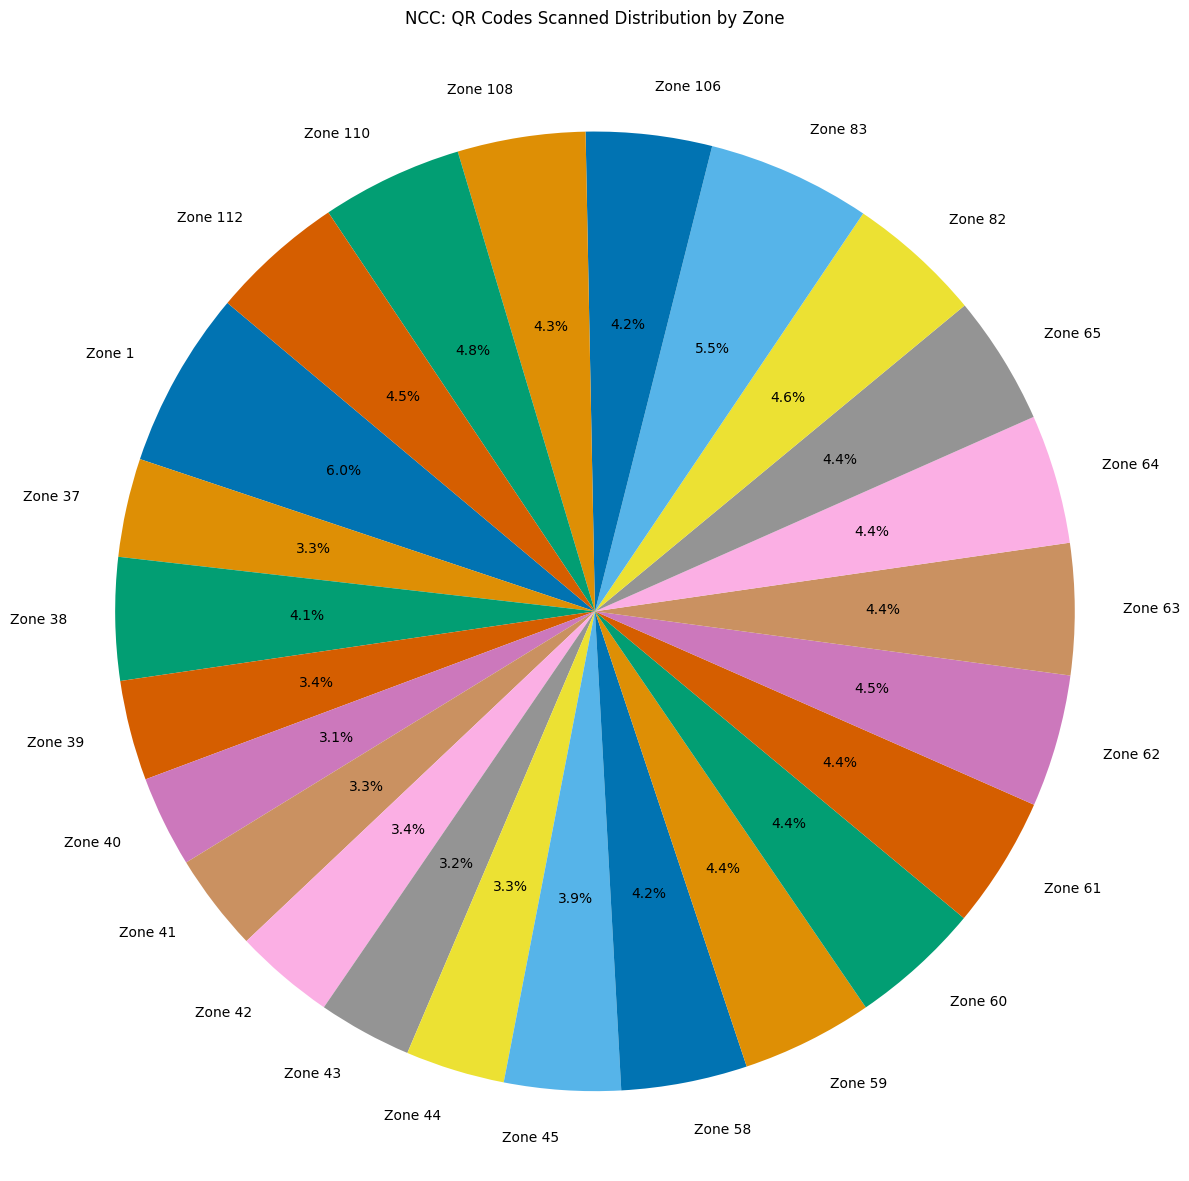

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files

CSV_FILE = "/content/NCC QR - Sheet1.csv"
org_name = "NCC"

try:
    # Check if the file exists
    if not os.path.exists(CSV_FILE):
        raise FileNotFoundError(f"CSV file not found at {CSV_FILE}. Please upload it to the Colab environment.")

    # Read the CSV file
    try:
        df = pd.read_csv(CSV_FILE)
        print(f"Successfully read file: {CSV_FILE}")
    except Exception as e:
        print(f"Error reading CSV file: {str(e)}")
        raise e

    # Ensure numeric columns are properly typed
    numeric_columns = ['No of Participants', 'No of QR Codes Given', 'No of  QR\'s Scanned']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Check for missing or non-numeric data
    if df[numeric_columns].isna().any().any():
        print("Warning: Missing or non-numeric data found. NaN values will be treated as 0.")
        df.fillna(0, inplace=True)

    # Group by Zone for analysis, preserving original order
    zone_summary = df.groupby('Zone').agg({
        'No of Participants': 'sum',
        'No of QR Codes Given': 'sum',
        'No of  QR\'s Scanned': 'sum',
        'Compartments': 'count'
    }).reset_index()
    # Sort zones as they appear in the data
    zone_order = df['Zone'].drop_duplicates().tolist()
    zone_summary['Zone'] = pd.Categorical(zone_summary['Zone'], categories=zone_order, ordered=True)
    zone_summary = zone_summary.sort_values('Zone').reset_index(drop=True)

    # Visualization 2: Pie Chart (QR Codes Scanned Distribution by Zone)
    plt.figure(figsize=(12, 12))
    colors = sns.color_palette("colorblind", len(zone_summary))
    plt.pie(zone_summary['No of  QR\'s Scanned'], labels=zone_summary['Zone'], autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 10})
    plt.title('{}: QR Codes Scanned Distribution by Zone'.format(org_name), pad=20)
    plt.axis('equal')
    plt.tight_layout()
    pie_file = 'zone_qr_scanned_{}.png'.format(org_name.lower().replace(" ", "_"))
    plt.savefig(pie_file, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # Download the generated visualization
    if os.path.exists(pie_file):
        print(f"Downloading {pie_file}")
        files.download(pie_file)
    else:
        print(f"File {pie_file} not generated.")

except Exception as e:
    print(f"Error during execution: {str(e)}")

Successfully read file: /content/NSS QR  - Sheet1.csv


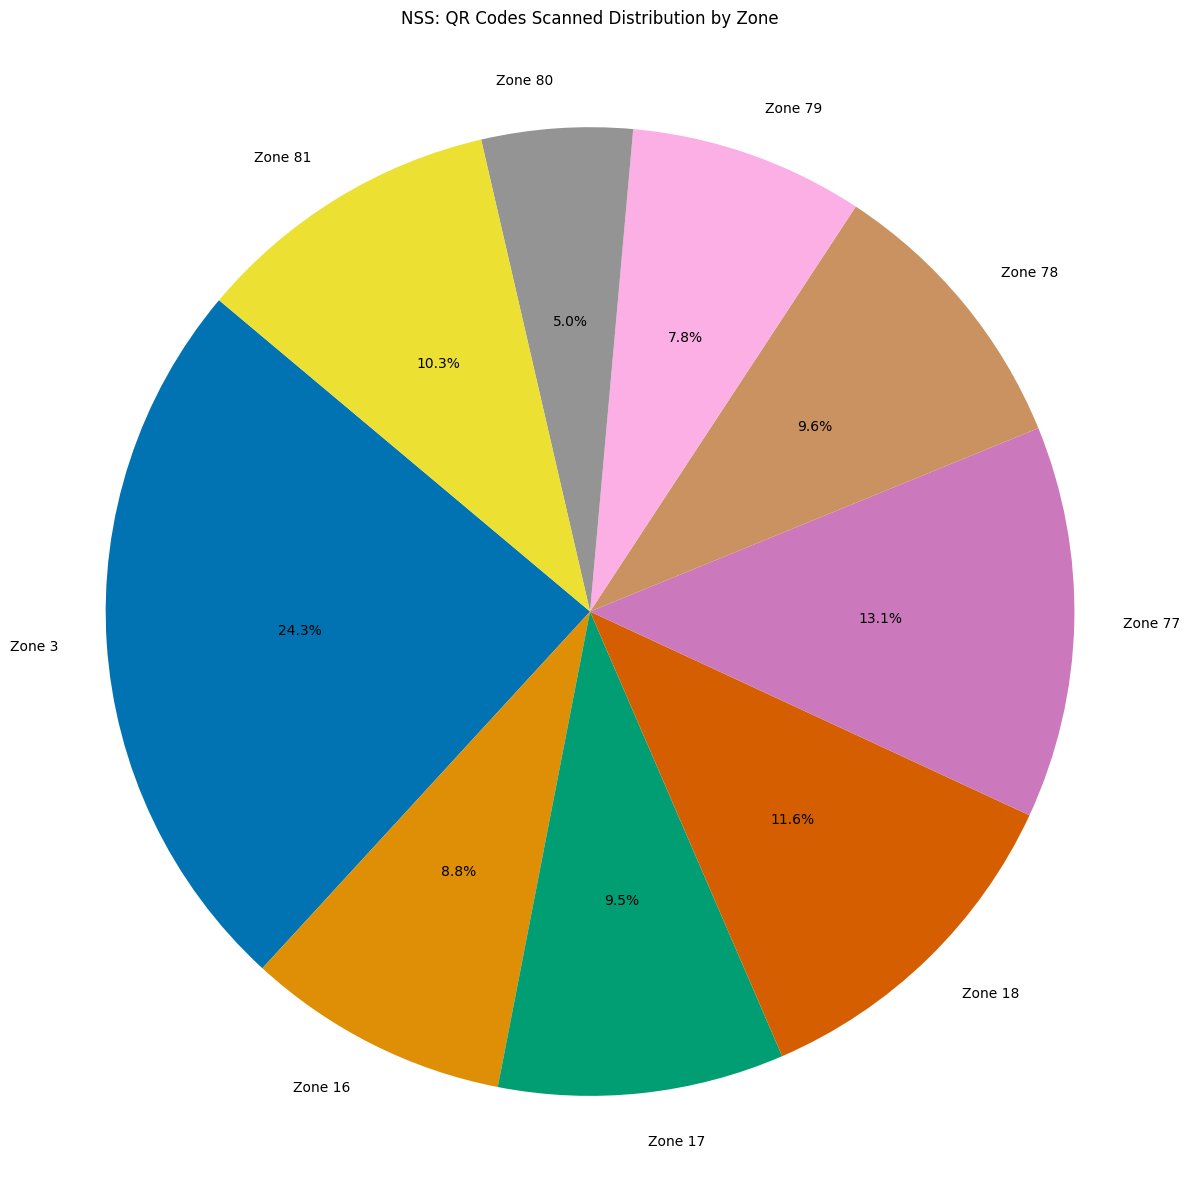

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files

CSV_FILE = "/content/NSS QR  - Sheet1.csv"
org_name = "NSS"

try:
    # Check if the file exists
    if not os.path.exists(CSV_FILE):
        raise FileNotFoundError(f"CSV file not found at {CSV_FILE}. Please upload it to the Colab environment.")

    # Read the CSV file
    try:
        df = pd.read_csv(CSV_FILE)
        print(f"Successfully read file: {CSV_FILE}")
    except Exception as e:
        print(f"Error reading CSV file: {str(e)}")
        raise e

    # Ensure numeric columns are properly typed
    numeric_columns = ['No of Participants', 'No of QR Codes Given', 'No of  QR\'s Scanned']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Check for missing or non-numeric data
    if df[numeric_columns].isna().any().any():
        print("Warning: Missing or non-numeric data found. NaN values will be treated as 0.")
        df.fillna(0, inplace=True)

    # Group by Zone for analysis, preserving original order
    zone_summary = df.groupby('Zone').agg({
        'No of Participants': 'sum',
        'No of QR Codes Given': 'sum',
        'No of  QR\'s Scanned': 'sum',
        'Compartments': 'count'
    }).reset_index()
    # Sort zones as they appear in the data
    zone_order = df['Zone'].drop_duplicates().tolist()
    zone_summary['Zone'] = pd.Categorical(zone_summary['Zone'], categories=zone_order, ordered=True)
    zone_summary = zone_summary.sort_values('Zone').reset_index(drop=True)

    # Visualization 2: Pie Chart (QR Codes Scanned Distribution by Zone)
    plt.figure(figsize=(12, 12))
    colors = sns.color_palette("colorblind", len(zone_summary))
    plt.pie(zone_summary['No of  QR\'s Scanned'], labels=zone_summary['Zone'], autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 10})
    plt.title('{}: QR Codes Scanned Distribution by Zone'.format(org_name), pad=20)
    plt.axis('equal')
    plt.tight_layout()
    pie_file = 'zone_qr_scanned_{}.png'.format(org_name.lower().replace(" ", "_"))
    plt.savefig(pie_file, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # Download the generated visualization
    if os.path.exists(pie_file):
        print(f"Downloading {pie_file}")
        files.download(pie_file)
    else:
        print(f"File {pie_file} not generated.")

except Exception as e:
    print(f"Error during execution: {str(e)}")

Successfully read file: /content/DDUGKY QR - Sheet1.csv


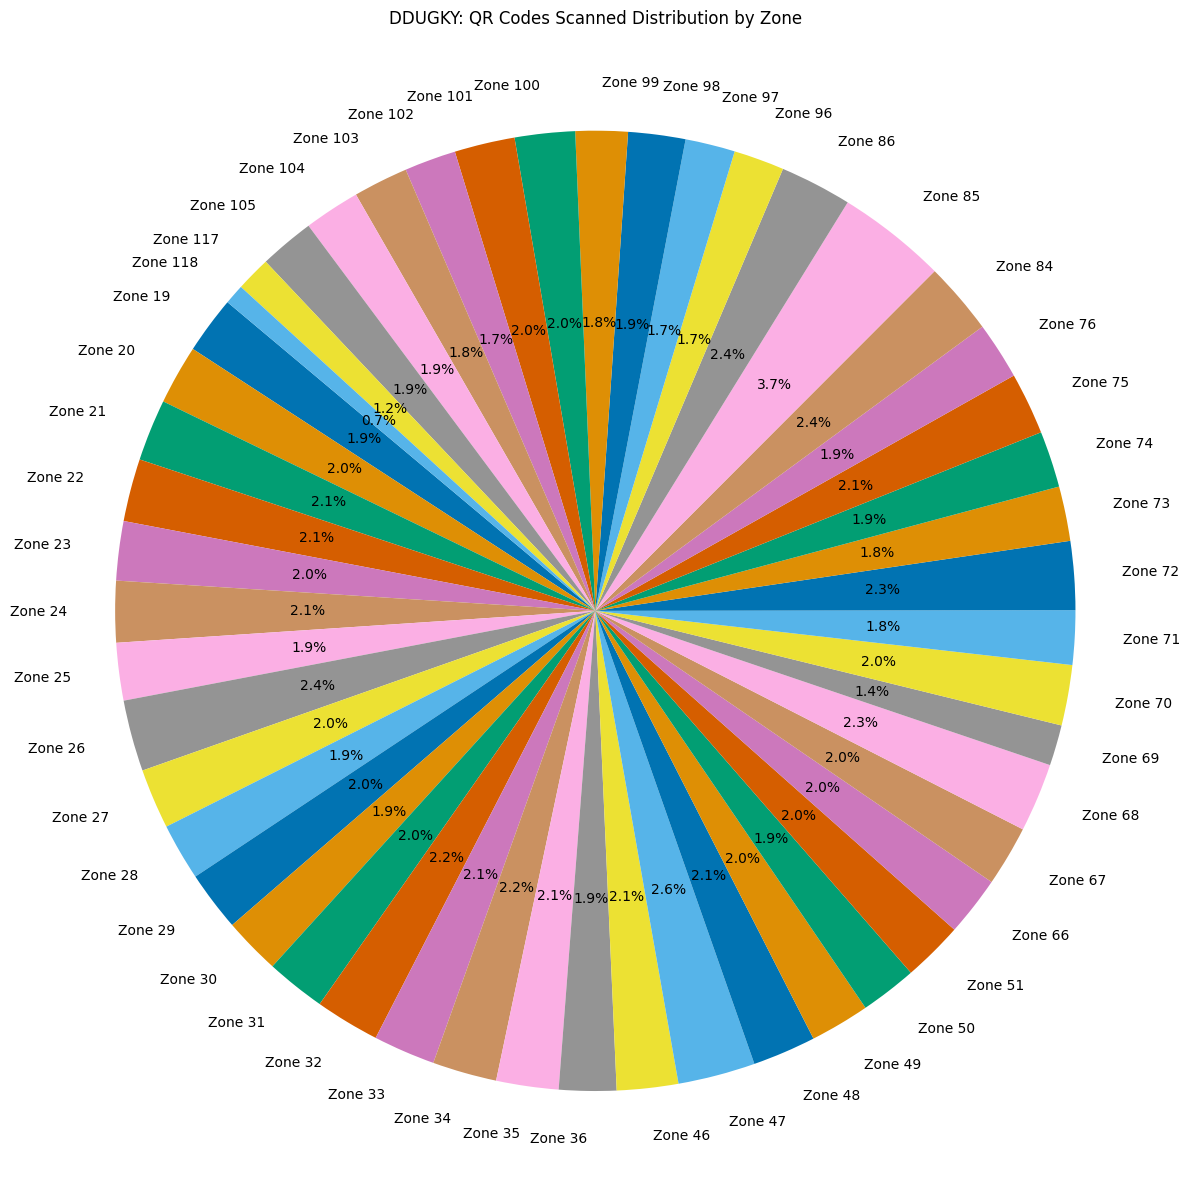

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files

CSV_FILE = "/content/DDUGKY QR - Sheet1.csv"
org_name = "DDUGKY"

try:
    # Check if the file exists
    if not os.path.exists(CSV_FILE):
        raise FileNotFoundError(f"CSV file not found at {CSV_FILE}. Please upload it to the Colab environment.")

    # Read the CSV file
    try:
        df = pd.read_csv(CSV_FILE)
        print(f"Successfully read file: {CSV_FILE}")
    except Exception as e:
        print(f"Error reading CSV file: {str(e)}")
        raise e

    # Ensure numeric columns are properly typed
    numeric_columns = ['No of Participants', 'No of QR Codes Given', 'No of  QR\'s Scanned']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Check for missing or non-numeric data
    if df[numeric_columns].isna().any().any():
        print("Warning: Missing or non-numeric data found. NaN values will be treated as 0.")
        df.fillna(0, inplace=True)

    # Group by Zone for analysis, preserving original order
    zone_summary = df.groupby('Zone').agg({
        'No of Participants': 'sum',
        'No of QR Codes Given': 'sum',
        'No of  QR\'s Scanned': 'sum',
        'Compartments': 'count'
    }).reset_index()
    # Sort zones as they appear in the data
    zone_order = df['Zone'].drop_duplicates().tolist()
    zone_summary['Zone'] = pd.Categorical(zone_summary['Zone'], categories=zone_order, ordered=True)
    zone_summary = zone_summary.sort_values('Zone').reset_index(drop=True)

    # Visualization 2: Pie Chart (QR Codes Scanned Distribution by Zone)
    plt.figure(figsize=(12, 12))
    colors = sns.color_palette("colorblind", len(zone_summary))
    plt.pie(zone_summary['No of  QR\'s Scanned'], labels=zone_summary['Zone'], autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 10})
    plt.title('{}: QR Codes Scanned Distribution by Zone'.format(org_name), pad=20)
    plt.axis('equal')
    plt.tight_layout()
    pie_file = 'zone_qr_scanned_{}.png'.format(org_name.lower().replace(" ", "_"))
    plt.savefig(pie_file, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # Download the generated visualization
    if os.path.exists(pie_file):
        print(f"Downloading {pie_file}")
        files.download(pie_file)
    else:
        print(f"File {pie_file} not generated.")

except Exception as e:
    print(f"Error during execution: {str(e)}")

Successfully read file: /content/Vizag Volunteers - Sheet1.csv


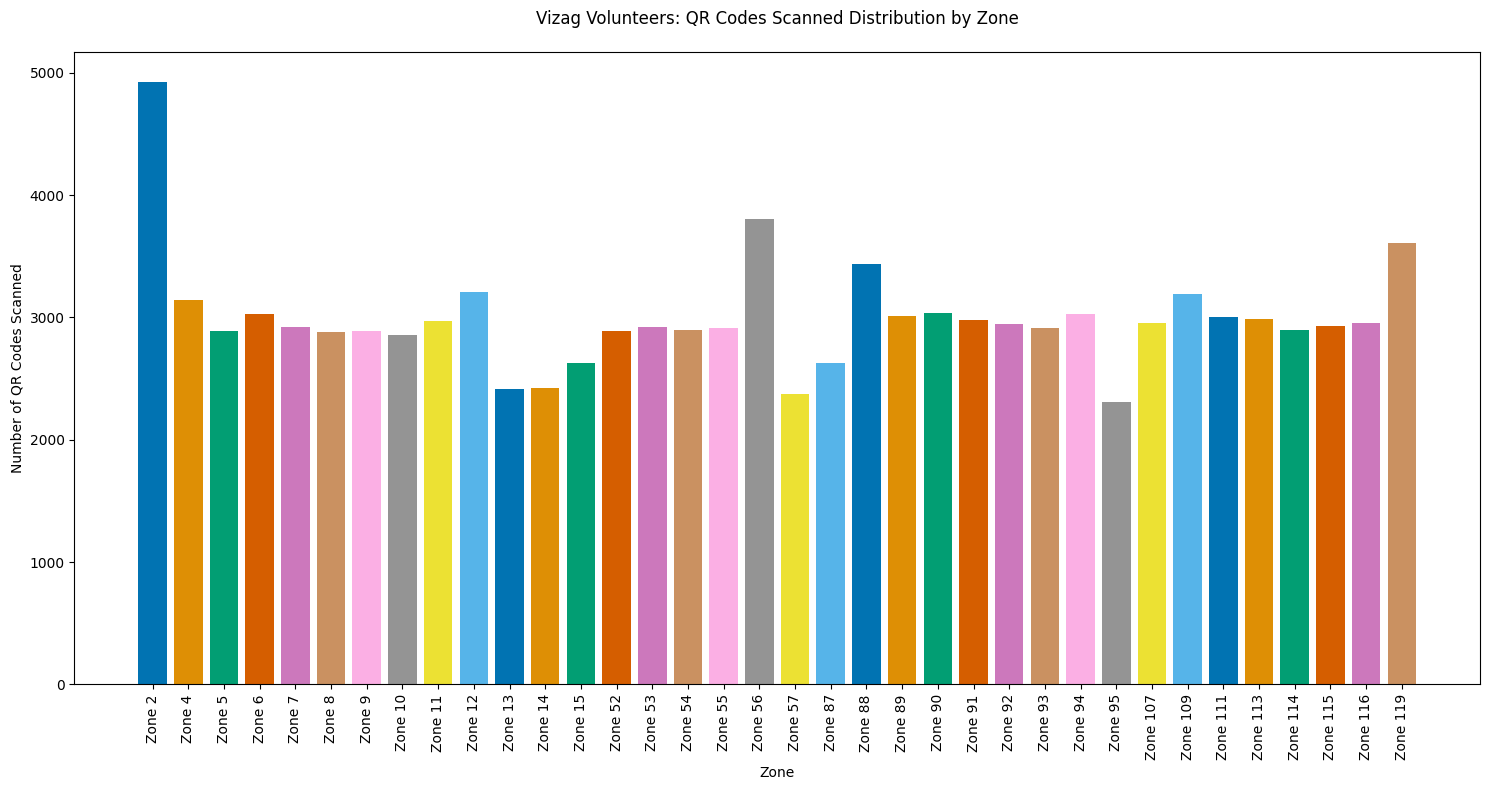

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files

CSV_FILE = "/content/Vizag Volunteers - Sheet1.csv"
org_name = "Vizag Volunteers"

try:
    # Check if the file exists
    if not os.path.exists(CSV_FILE):
        raise FileNotFoundError(f"CSV file not found at {CSV_FILE}. Please upload it to the Colab environment.")

    # Read the CSV file
    try:
        df = pd.read_csv(CSV_FILE)
        print(f"Successfully read file: {CSV_FILE}")
    except Exception as e:
        print(f"Error reading CSV file: {str(e)}")
        raise e

    # Ensure numeric columns are properly typed
    numeric_columns = ['No of Participants', 'No of QR Codes Given', 'No of  QR\'s Scanned']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Check for missing or non-numeric data
    if df[numeric_columns].isna().any().any():
        print("Warning: Missing or non-numeric data found. NaN values will be treated as 0.")
        df.fillna(0, inplace=True)

    # Group by Zone for analysis, preserving original order
    zone_summary = df.groupby('Zone').agg({
        'No of Participants': 'sum',
        'No of QR Codes Given': 'sum',
        'No of  QR\'s Scanned': 'sum',
        'Compartments': 'count'
    }).reset_index()
    # Sort zones as they appear in the data
    zone_order = df['Zone'].drop_duplicates().tolist()
    zone_summary['Zone'] = pd.Categorical(zone_summary['Zone'], categories=zone_order, ordered=True)
    zone_summary = zone_summary.sort_values('Zone').reset_index(drop=True)

    # Visualization 2: Column Chart (QR Codes Scanned Distribution by Zone)
    plt.figure(figsize=(15, 8))
    colors = sns.color_palette("colorblind", len(zone_summary))
    bars = plt.bar(zone_summary['Zone'], zone_summary['No of  QR\'s Scanned'], color=colors)
    plt.xlabel('Zone')
    plt.ylabel('Number of QR Codes Scanned')
    plt.title('{}: QR Codes Scanned Distribution by Zone'.format(org_name), pad=20)
    plt.xticks(rotation=90)
    plt.tight_layout()
    pie_file = 'zone_qr_scanned_{}.png'.format(org_name.lower().replace(" ", "_"))
    plt.savefig(pie_file, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # Download the generated visualization
    if os.path.exists(pie_file):
        print(f"Downloading {pie_file}")
        files.download(pie_file)
    else:
        print(f"File {pie_file} not generated.")

except Exception as e:
    print(f"Error during execution: {str(e)}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

# Specify the CSV file path (replace with your actual path)
csv_path = "/content/feedback sheet - Sheet2.csv"  # Update this path as needed

# Load and clean the data
df = pd.read_csv(csv_path)
df = df.dropna(how='all')  # Remove fully empty rows
df['Major Challenges'] = df['Major Challenges'].fillna('None')
df['Police Performance'] = df['Police Performance'].fillna('Unknown')

# Aggregate challenges by zone
challenges = df['Major Challenges'].str.split(', ').explode().value_counts()
police_performance = df.groupby('Zone No')['Police Performance'].apply(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')

# Bar chart for major challenges
plt.figure(figsize=(10, 6))
challenges.plot(kind='bar')
plt.title('Frequency of Major Challenges Across Zones')
plt.xlabel('Challenges')
plt.ylabel('Number of Zones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('challenges_bar_chart.png')
plt.close()

# Heatmap for police performance and overcrowding by zone
zone_data = df.groupby('Zone No').agg({
    'Police Performance': lambda x: 1 if x.mode()[0] in ['Poor', 'Average'] else 0,
    'Major Challenges': lambda x: 1 if 'Crowd' in str(x).lower() else 0
}).rename(columns={'Police Performance': 'Poor Police Support', 'Major Challenges': 'Overcrowding'})
sns.heatmap(zone_data, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Heatmap of Poor Police Support and Overcrowding by Zone')
plt.xlabel('Issue Type')
plt.ylabel('Zone Number')
plt.tight_layout()
plt.savefig('police_overcrowding_heatmap.png')
plt.close()

# Download the visualizations
files.download('challenges_bar_chart.png')
files.download('police_overcrowding_heatmap.png')

print("Visualizations generated and downloaded. Add these to your report!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Visualizations generated and downloaded. Add these to your report!


Index(['SI NO', 'Zone No', 'Zone Lead Name', 'Zone Lead Feedback',
       'No.of Compartments', 'No.of Team Leads', 'Team Lead Name',
       'Compartment No', 'Team Lead Report', 'No.of Volunteers',
       'Police Performance', 'Compartment Report',
       'Feedback on Compartment Incharge ', 'Transportation  Report',
       'Major Challenges', 'Food ', 'Unnamed: 16', 'Certificate', 'Sockets',
       'T-Shirt', 'Wifi', 'Unnamed: 21', 'Unnamed: 22',
       'Participant's Behaviour', 'No of QR's Scanned',
       'No of Participants Present', 'Major Challenges Faced',
       'Opinion About Event'],
      dtype='object')


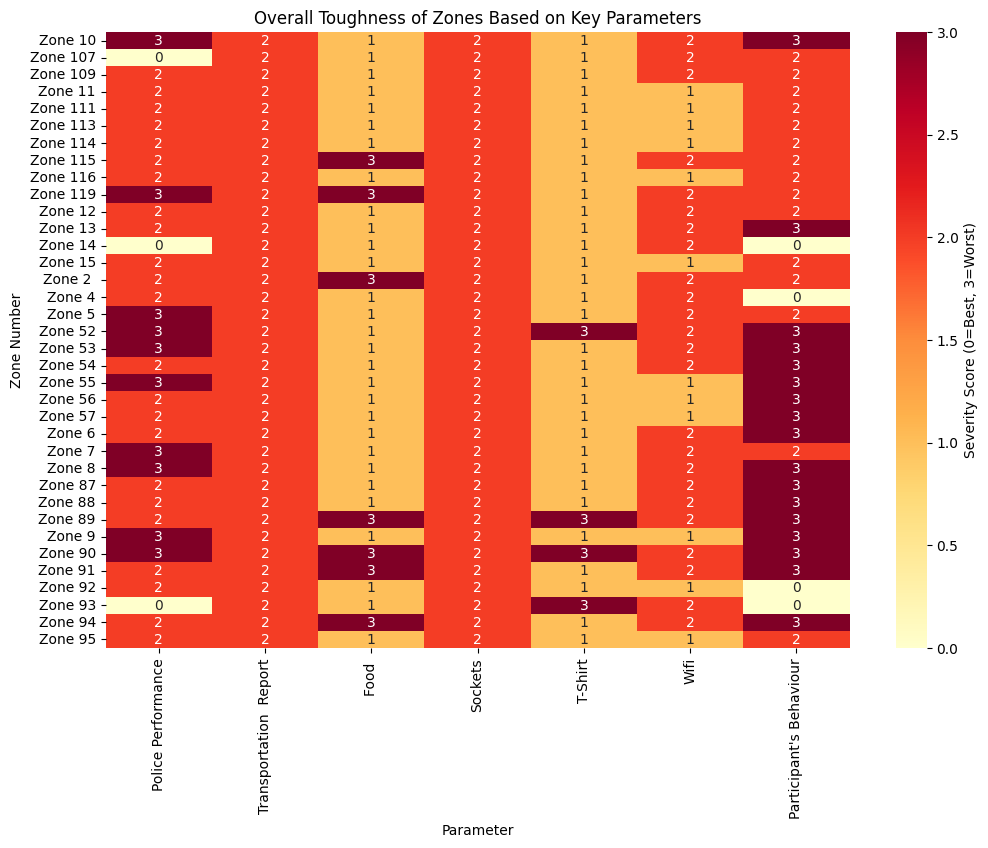

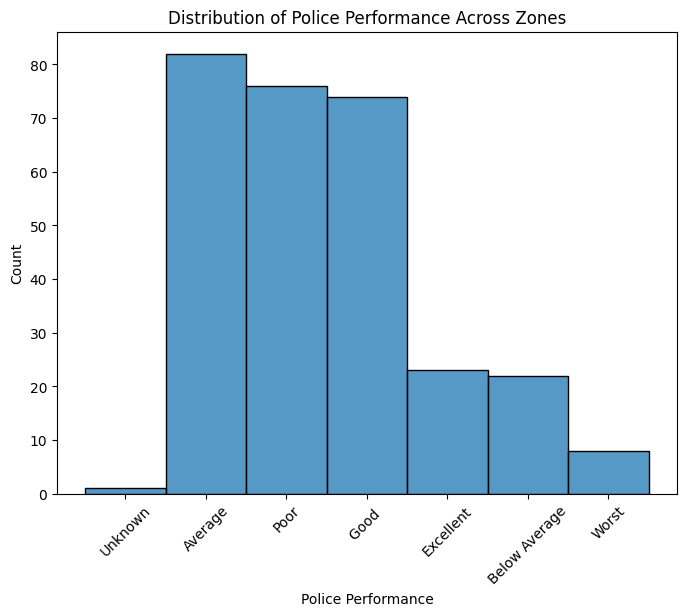

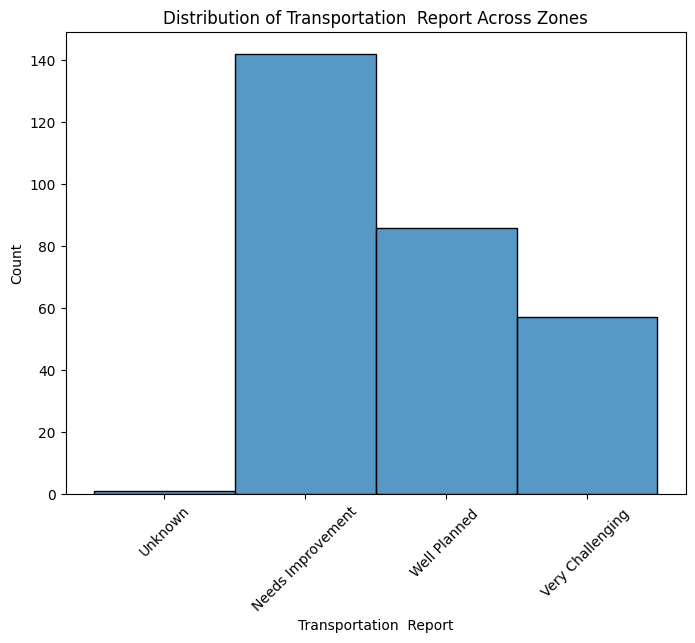

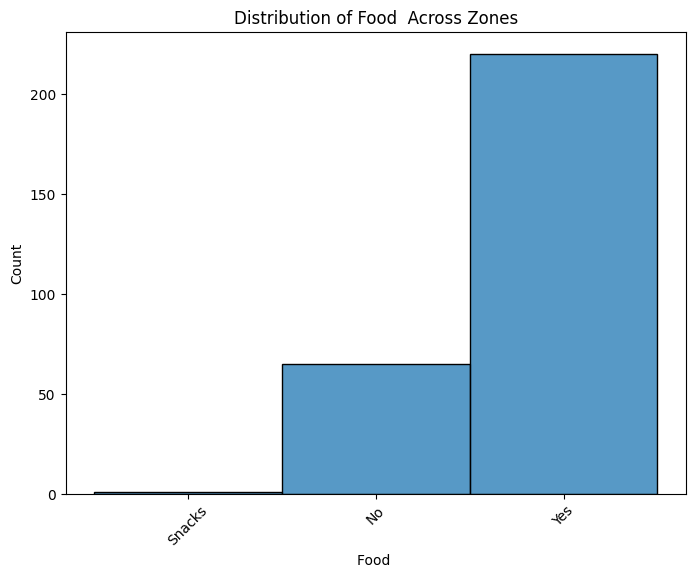

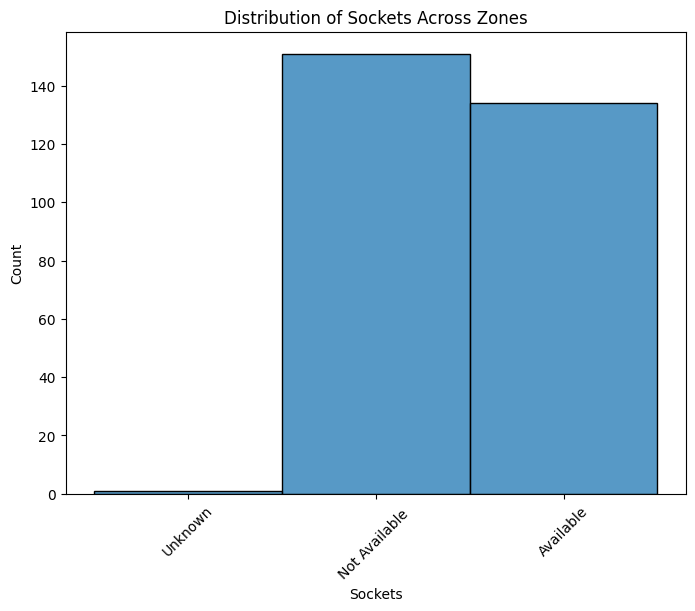

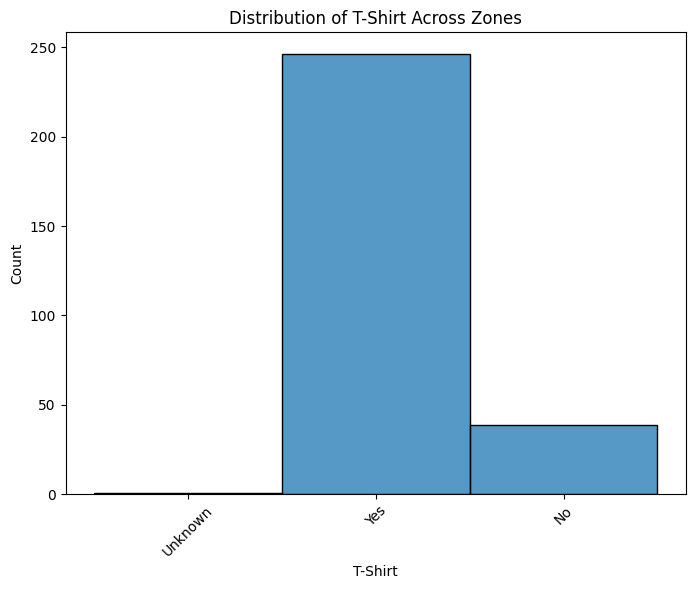

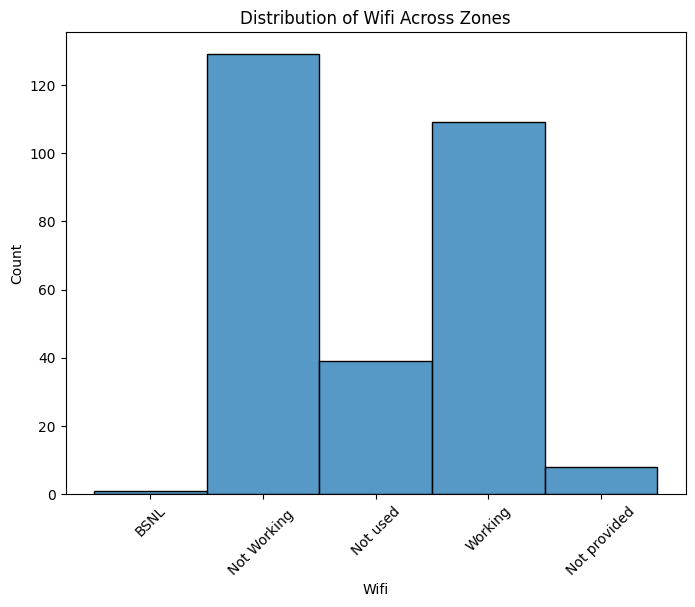

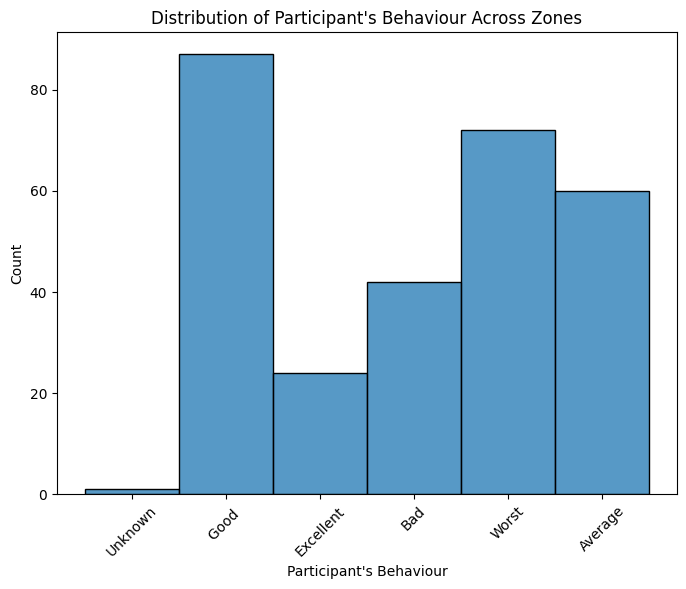

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Visualizations generated, displayed, and downloaded.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

# Specify the CSV file path (replace with your actual path)
csv_path = "/content/feedback sheet - Sheet2.csv"  # Update this path as needed

# Load and clean the data
df = pd.read_csv(csv_path)
df = df.dropna(how='all')  # Remove fully empty rows

# Print column names to identify correct ones
print(df.columns)

df = df.fillna({'Police Performance': 'Unknown', 'Transportation  Report': 'Unknown',
                'Food ': 'Unknown', 'Sockets': 'Unknown', 'T-Shirt': 'Unknown',
                'Wifi': 'Unknown', 'Participant\'s Behaviour': 'Unknown'})

# Define scoring function for categorical data
def score_category(value):
    score_map = {'Poor': 3, 'Average': 2, 'Good': 1, 'Excellent': 0, 'Worst': 3,
                 'Needs Improvement': 2, 'Well Planned': 1, 'Very Challenging': 3,
                 'Unknown': 2, 'Bad': 3, 'Moderate / Average': 2,
                 'Highly Supportive & Well Managed': 1, 'Not available' : 2, 'Yes': 1, 'No': 3, 'Not Working': 3, 'Working': 1} # Added scores for Not available, Yes, No, Not Working, Working
    return score_map.get(value, 2)  # Default to 2 if value not in map

# Aggregate data by zone
zone_data = df.groupby('Zone No').agg({
    'Police Performance': lambda x: score_category(x.mode()[0] if not x.mode().empty else 'Unknown'),
    'Transportation  Report': lambda x: score_category(x.mode()[0] if not x.mode().empty else 'Unknown'),
    'Food ': lambda x: score_category(x.mode()[0] if not x.mode().empty else 'Unknown'),
    'Sockets': lambda x: score_category(x.mode()[0] if not x.mode().empty else 'Unknown'),
    'T-Shirt': lambda x: score_category(x.mode()[0] if not x.mode().empty else 'Unknown'),
    'Wifi': lambda x: score_category(x.mode()[0] if not x.mode().empty else 'Unknown'),
    'Participant\'s Behaviour': lambda x: score_category(x.mode()[0] if not x.mode().empty else 'Unknown')
}).reset_index()

# Generate overall toughness heatmap
zone_data_heatmap = zone_data.set_index('Zone No')
plt.figure(figsize=(12, 8))
sns.heatmap(zone_data_heatmap, annot=True, cmap='YlOrRd', fmt='d',
            cbar_kws={'label': 'Severity Score (0=Best, 3=Worst)'})
plt.title('Overall Toughness of Zones Based on Key Parameters')
plt.xlabel('Parameter')
plt.ylabel('Zone Number')
plt.show()  # Display in Colab
plt.savefig('overall_toughness_heatmap.png')
plt.close()

# Generate individual bar charts/histograms for each parameter
parameters = ['Police Performance', 'Transportation  Report', 'Food ', 'Sockets', 'T-Shirt', 'Wifi', 'Participant\'s Behaviour']
for param in parameters:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=param, discrete=True, stat='count')
    plt.title(f'Distribution of {param} Across Zones')
    plt.xlabel(param)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()  # Display in Colab
    plt.savefig(f'{param.lower().replace(" ", "_")}_distribution.png')
    plt.close()

# Download the visualizations
files.download('overall_toughness_heatmap.png')
for param in parameters:
    files.download(f'{param.lower().replace(" ", "_")}_distribution.png')

print("Visualizations generated, displayed, and downloaded.")

Index(['SI NO', 'Zone No', 'Zone Lead Name', 'Zone Lead Feedback',
       'No.of Compartments', 'No.of Team Leads', 'Team Lead Name',
       'Compartment No', 'Team Lead Report', 'No.of Volunteers',
       'Police Performance', 'Compartment Report',
       'Feedback on Compartment Incharge ', 'Transportation  Report',
       'Major Challenges', 'Food ', 'Unnamed: 16', 'Certificate', 'Sockets',
       'T-Shirt', 'Wifi', 'Unnamed: 21', 'Unnamed: 22',
       'Participant's Behaviour', 'No of QR's Scanned',
       'No of Participants Present', 'Major Challenges Faced',
       'Opinion About Event'],
      dtype='object')


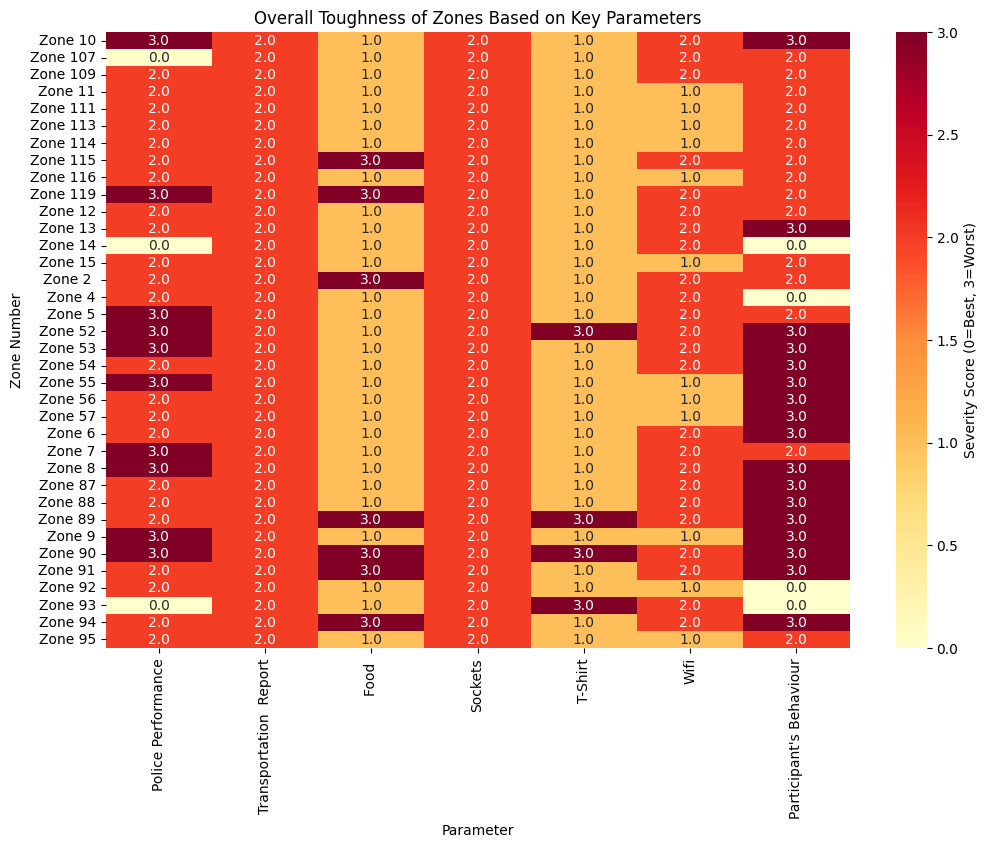

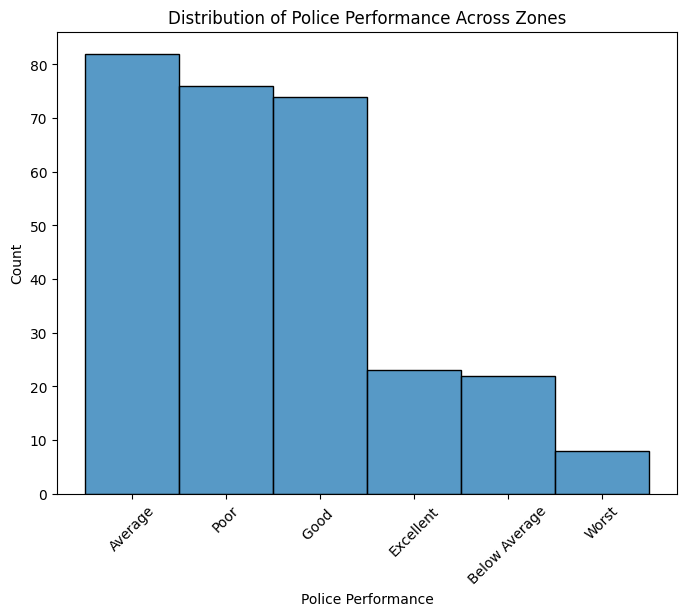

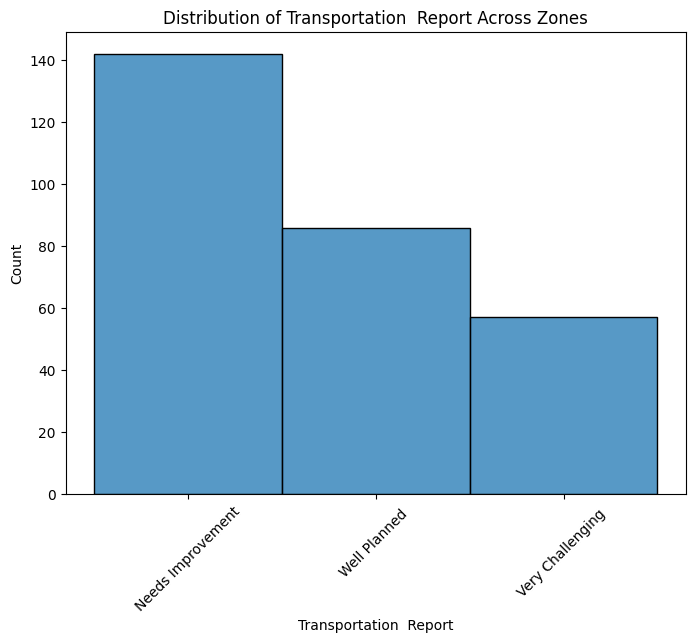

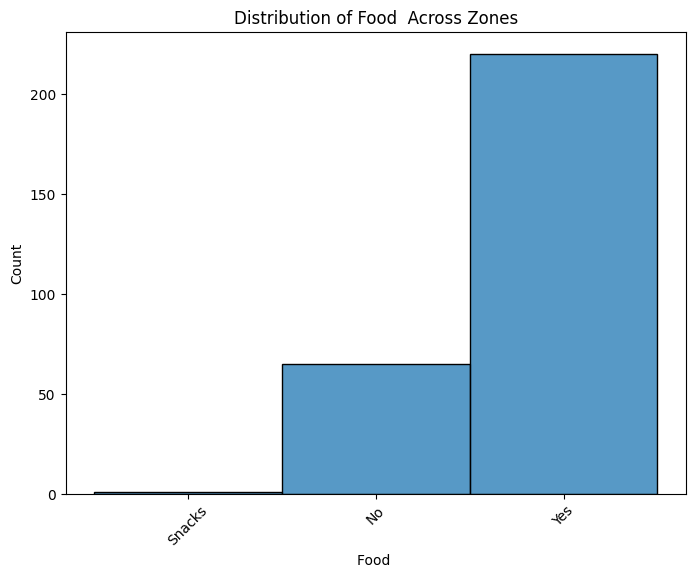

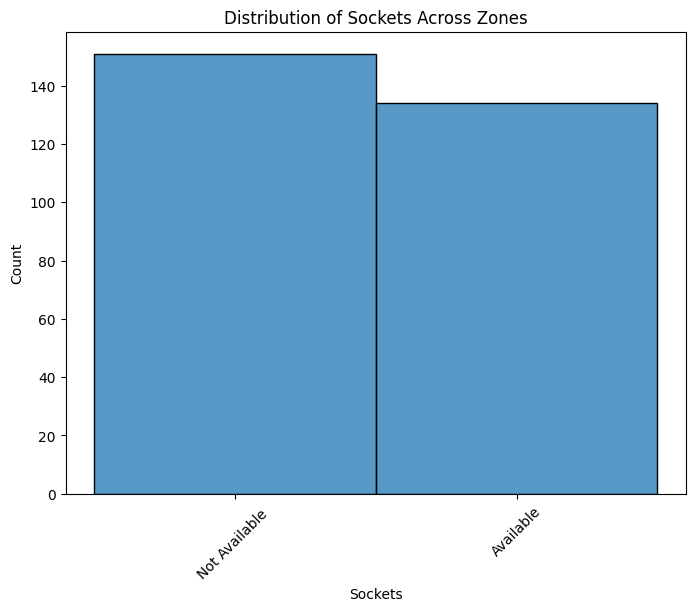

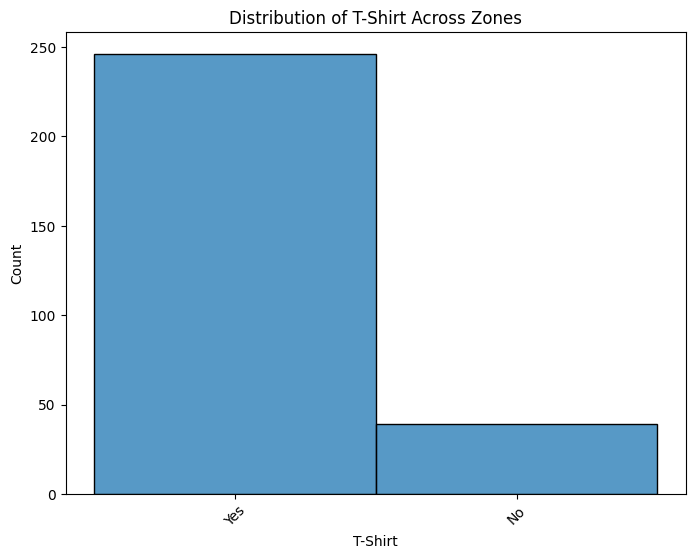

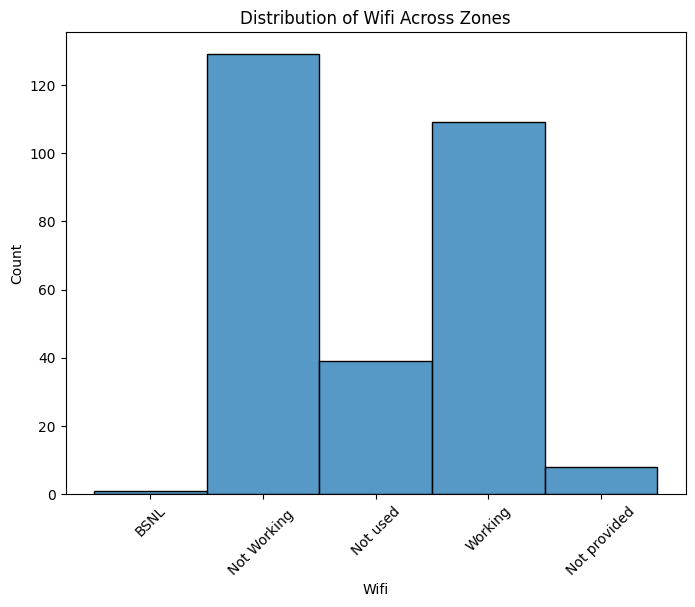

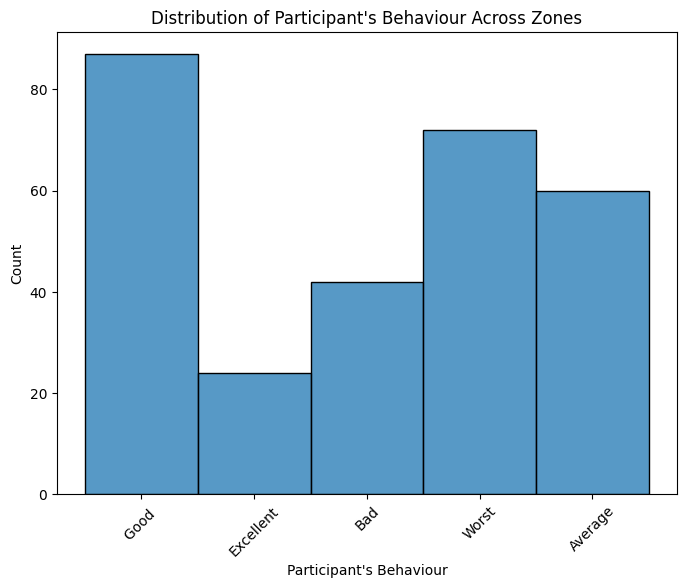

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Visualizations generated, displayed, and downloaded.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

# Specify the CSV file path (replace with your actual path)
csv_path = "/content/feedback sheet - Sheet2.csv"  # Update this path as needed

# Load and clean the data
df = pd.read_csv(csv_path)
df = df.dropna(how='all')  # Remove fully empty rows

# Print column names to identify correct ones
print(df.columns)

# Based on previous output, the correct column names are:
# 'Transportation  Report', 'Food ', 'Wifi' which contains BSNL, ACT, APSFL
df = df.fillna({'Police Performance': 'Unknown', 'Transportation  Report': 'Unknown',
                'Food ': 'Unknown', 'Sockets': 'Unknown',
                'T-Shirt': 'Unknown', 'Wifi': 'Unknown',
                'Participant\'s Behaviour': 'Unknown'})

# Define scoring function for categorical data
def score_category(value):
    score_map = {'Poor': 3, 'Average': 2, 'Good': 1, 'Excellent': 0, 'Worst': 3,
                 'Needs Improvement': 2, 'Well Planned': 1, 'Very Challenging': 3,
                 'Unknown': 2, 'Bad': 3, 'Moderate / Average': 2,
                 'Highly Supportive & Well Managed': 1, 'Not available' : 2, 'Yes': 1, 'No': 3, 'Not Working': 3, 'Working': 1}
    return score_map.get(value, 2)  # Default to 2 if value not in map

# Aggregate data by zone, excluding 'Unknown'
zone_data = df.groupby('Zone No').agg({
    'Police Performance': lambda x: score_category(x[x != 'Unknown'].mode()[0] if not x[x != 'Unknown'].mode().empty else 2),
    'Transportation  Report': lambda x: score_category(x[x != 'Unknown'].mode()[0] if not x[x != 'Unknown'].mode().empty else 2),
    'Food ': lambda x: score_category(x[x != 'Unknown'].mode()[0] if not x[x != 'Unknown'].mode().empty else 2),
    'Sockets': lambda x: score_category(x[x != 'Unknown'].mode()[0] if not x[x != 'Unknown'].mode().empty else 2),
    'T-Shirt': lambda x: score_category(x[x != 'Unknown'].mode()[0] if not x[x != 'Unknown'].mode().empty else 2),
    'Wifi': lambda x: score_category(x[x != 'Unknown'].mode()[0] if not x[x != 'Unknown'].mode().empty else 2),
    'Participant\'s Behaviour': lambda x: score_category(x[x != 'Unknown'].mode()[0] if not x[x != 'Unknown'].mode().empty else 2)
}).reset_index()

# No need to combine Food (Snacks + Breakfast) and Wifi (BSNL, ACT, APSFL) scores
# as the column names are already correct.
zone_data = zone_data[['Zone No', 'Police Performance', 'Transportation  Report', 'Food ', 'Sockets', 'T-Shirt', 'Wifi', 'Participant\'s Behaviour']]

# Generate overall toughness heatmap
zone_data_heatmap = zone_data.set_index('Zone No')
plt.figure(figsize=(12, 8))
sns.heatmap(zone_data_heatmap, annot=True, cmap='YlOrRd', fmt='.1f',
            cbar_kws={'label': 'Severity Score (0=Best, 3=Worst)'})
plt.title('Overall Toughness of Zones Based on Key Parameters')
plt.xlabel('Parameter')
plt.ylabel('Zone Number')
plt.show()  # Display in Colab
plt.savefig('overall_toughness_heatmap.png')
plt.close()

# Generate individual bar charts/histograms for each parameter
parameters = ['Police Performance', 'Transportation  Report', 'Food ', 'Sockets', 'T-Shirt', 'Wifi', 'Participant\'s Behaviour']
for param in parameters:
    plt.figure(figsize=(8, 6))
    # Filter out 'Unknown' before plotting
    sns.histplot(data=df[df[param] != 'Unknown'], x=param, discrete=True, stat='count')
    plt.title(f'Distribution of {param} Across Zones')
    plt.xlabel(param)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()  # Display in Colab
    plt.savefig(f'{param.lower().replace(" ", "_")}_distribution.png')
    plt.close()

# Download the visualizations
files.download('overall_toughness_heatmap.png')
for param in parameters:
    files.download(f'{param.lower().replace(" ", "_")}_distribution.png')

print("Visualizations generated, displayed, and downloaded.")